**NAME :- KONKAL KAILASH VENKATESH**

**BATCH NO :- DS2312**

**PROJECT :- GLOBAL POWER PLANT**

In [1]:
# import neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
# import data

data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0              2.41461          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 907
No. of columns 27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the Above observation, 

* There are no null values present in the dataset
* There are 907 rows and 27 column in the dataset
* some of features are of object datatype and others are float.

# Statistical Analysis

#### Since dataset is large lets check for any entry whic is repeated or duplicated in dataset

In [5]:
data.duplicated().sum()

0

#### There are no duplicate Entries present in data

if we check CSV file and look at datasets head, there are lot of data cleaning operations need to done before performing any EDA and ML Modeling. At sight we can come across following observation in csv file.

* Lot of missing data in certain columns.
* Lot of Non-Relevent data like gppd_idnr,url, etc....

At end data need to clean and we will try to do some features engineering afterwards to modify some columns.

First let's remove empty columns and irrelevent columns.

In [6]:
data.drop(columns=['country','country_long','url','year_of_capacity_data','gppd_idnr','owner',
                  'other_fuel2','other_fuel3','estimated_generation_gwh','wepp_id'],axis = 1,inplace = True)

# Statstical Matrix

#### Missing Value Check

In [7]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                        Missing_values  %Missing values
generation_gwh_2019                906        99.889746
other_fuel1                        709        78.169791
generation_gwh_2014                503        55.457552
generation_gwh_2015                479        52.811466
generation_gwh_2016                467        51.488423
generation_gwh_2017                461        50.826902
generation_gwh_2013                461        50.826902
generation_gwh_2018                454        50.055127
generation_data_source             453        49.944873
commissioning_year                 374        41.234840
latitude                            46         5.071665
longitude                           46         5.071665
geolocation_source                  19         2.094818
capacity_mw                          0         0.000000
source                               0         0.000000
primary_fuel                         0         0.000000
name                                 0         0

## Missing Value Imputation

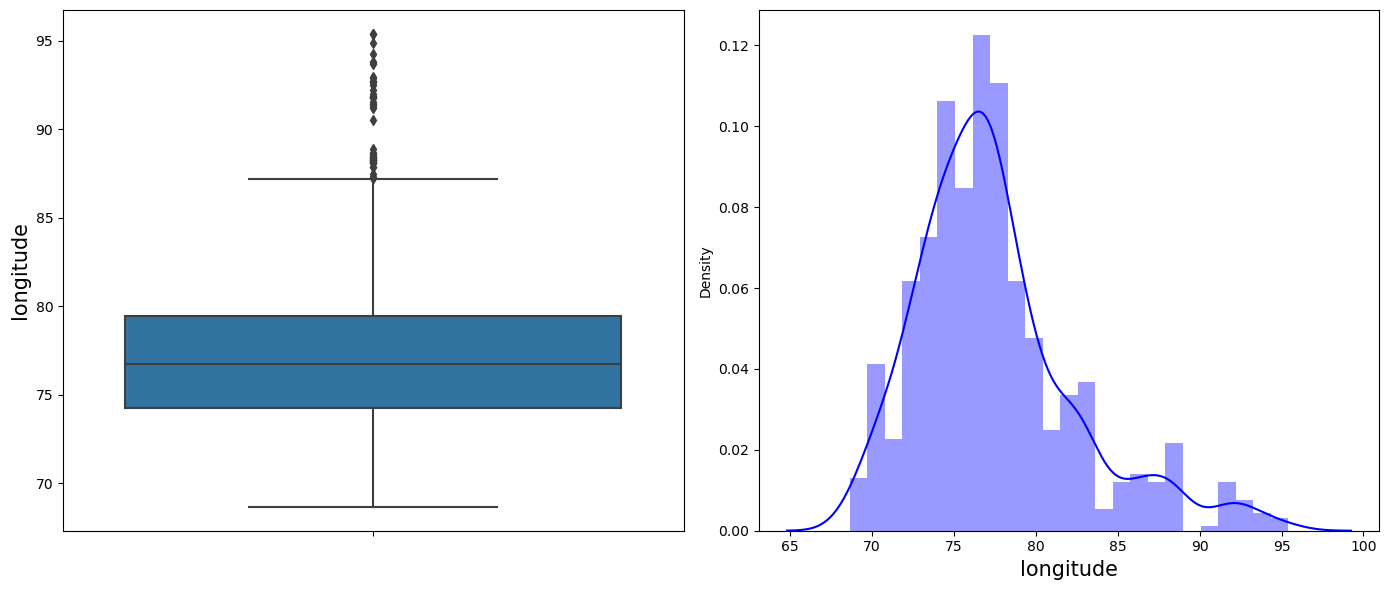

In [8]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(y='longitude',data = data)
plt.ylabel('longitude',fontsize = 15)
plt.subplot(1,2,2)
sns.distplot(data['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

#### Based on presence of outliers we will impute longitude we with median.

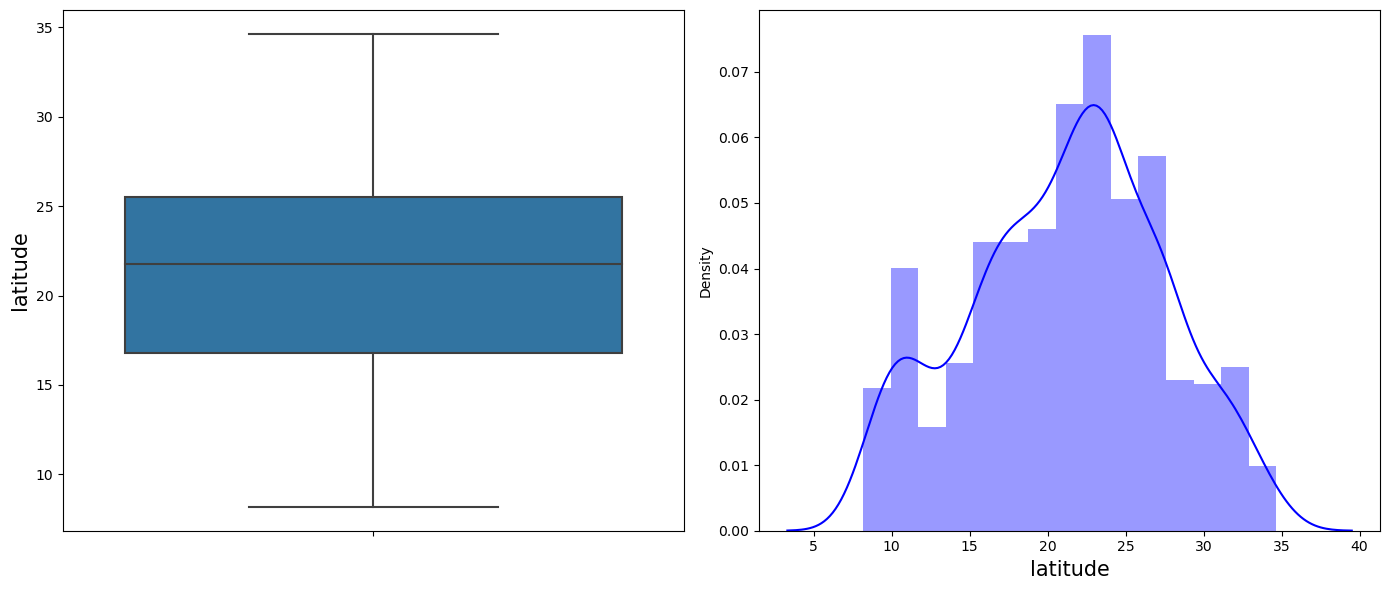

In [9]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(y='latitude',data = data)
plt.ylabel('latitude',fontsize = 15)
plt.subplot(1,2,2)
sns.distplot(data['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

#### Based on absense of outliers we will impute latitude we with mean.

In [10]:
#Missing value imputation of geolocation with mode.

data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
#Missing value imputation of longitude with median.
data['longitude'] = data['longitude'].fillna(data['longitude'].median())
#Missing value imputation of latitude with mean.
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())

In [11]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                        Missing_values  %Missing values
generation_gwh_2019                906        99.889746
other_fuel1                        709        78.169791
generation_gwh_2014                503        55.457552
generation_gwh_2015                479        52.811466
generation_gwh_2016                467        51.488423
generation_gwh_2017                461        50.826902
generation_gwh_2013                461        50.826902
generation_gwh_2018                454        50.055127
generation_data_source             453        49.944873
commissioning_year                 374        41.234840
name                                 0         0.000000
capacity_mw                          0         0.000000
source                               0         0.000000
primary_fuel                         0         0.000000
longitude                            0         0.000000
latitude                             0         0.000000
geolocation_source                   0         0

# Statstical Matrix

In [12]:
data.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          533.000000   
mean    326.223755   21.197918   77.427103         1997.078799   
std     590.085456    6.079148    4.815073           17.119477   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1988.000000   
50%      59.200000   21.281800   76.719500         2001.000000   
75%     385.250000   25.176450   79.206100         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           446.000000           404.000000           428.000000   
mean            436.579872          2410.620062          2406.769148   
std            1624.717598          4002.130125          4170.303340   
min            -947.600000             0.000000             0.000000   
25%               0.688250           219.417762           180.793688   
50%              14.264000           794.587100           697.450781   
75%             138.133250          3014.967937          3020.045750   
max           14779.303000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           440.000000           446.000000           453.000000  
mean           2449.949567          2531.301939          2595.299215  
std            4139.826108          4174.261177          4294.595169  
min               0.000000             0.000000             0.000000  
25%             186.152062           178.397305           196.054800  
50%             737.205450           817.977250           798.381000  
75%            3269.942437          3263.677500          3139.308000  
max           30015.000000         35116.000000         35136.000000

From the above observation, we can say that

* Biggest Powerplant has power generation capicity of 4760 MW.
* In each generation-GWHours columns Mean is greater than Medians.
* Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
* Median of capicty MW is 60MW. This suggest that there are lot of small capicity powerplant in dataset.

#### We have two different Target features for regression and classification model.LetStart exploring both Target Featres.

# Regression Target features- Capacity

#### Before visualing features let find details about Smallest & Biggest Powerplant

In [13]:
print('Minimum Capacity of powerplant :',data.capacity_mw.min())
print('Maximum Capacity of powerplant :',data.capacity_mw.max())

Minimum Capacity of powerplant : 0.0
Maximum Capacity of powerplant : 4760.0


In [14]:
data.loc[data.capacity_mw==4760]

name  capacity_mw  latitude  longitude primary_fuel  \
880  VINDH_CHAL STPS       4760.0   24.0983    82.6719         Coal   

    other_fuel1  commissioning_year                         source  \
880         Oil              2002.0  Central Electricity Authority   

    geolocation_source  generation_gwh_2013  generation_gwh_2014  \
880                WRI               11.354              27594.0   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
880              29047.0              30015.0              35116.0   

     generation_gwh_2018 generation_gwh_2019         generation_data_source  
880              35136.0                 NaN  Central Electricity Authority

In [15]:
data.loc[data.capacity_mw==0]

name  capacity_mw  latitude  \
829  Tata BP - Electronics City Solar Panel Plant          0.0   12.8491   

     longitude primary_fuel other_fuel1  commissioning_year  \
829    77.6752        Solar         NaN                 NaN   

                          source geolocation_source  generation_gwh_2013  \
829  Tata BP Solar India Limited     Industry About                  0.0   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
829                  NaN                  NaN                  NaN   

     generation_gwh_2017  generation_gwh_2018 generation_gwh_2019  \
829                  NaN                  NaN                 NaN   

    generation_data_source  
829                    NaN

* Biggest powerplant in india as per database is VINDH_CHAL STPS with power generation capicity of 4760 MW.As name suggest this Thermal powerplant with coal as primary Fuel and alternate fuel is oil. it is commission in year 2002.
* The Smallest powerplant is mentioned as Tata BP- Electronics City Solar Panel Plant with capicity of 0 MW. This Must be data entry errors as if powerplant is commision it cannot have capacity of 0 MW.

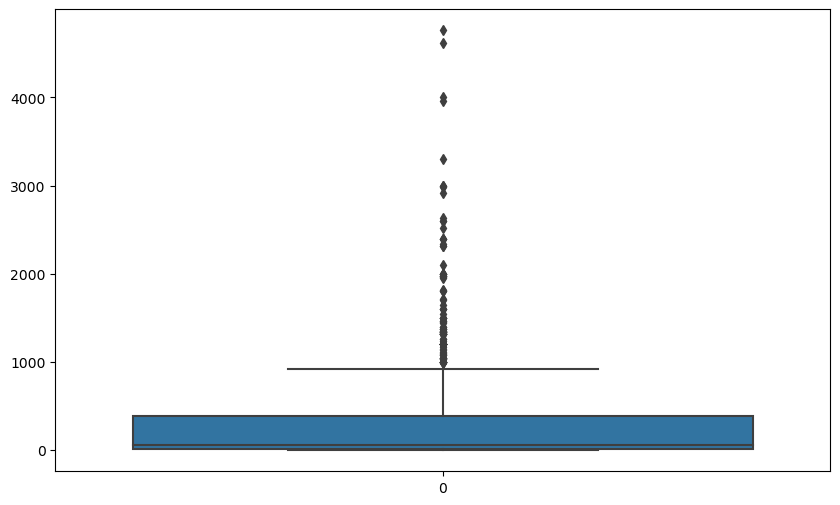

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data['capacity_mw'])
plt.show()

We can see there are powerplants of capicity more than 1500 MW.

In [17]:
data.loc[data.capacity_mw > 1500].shape

(39, 17)

#### There are 17 powerplant of capacity more than 1500 MW.

In [18]:
pd.crosstab(data['capacity_mw'],data['primary_fuel'],margins=True).T.style.background_gradient(cmap='summer_r')

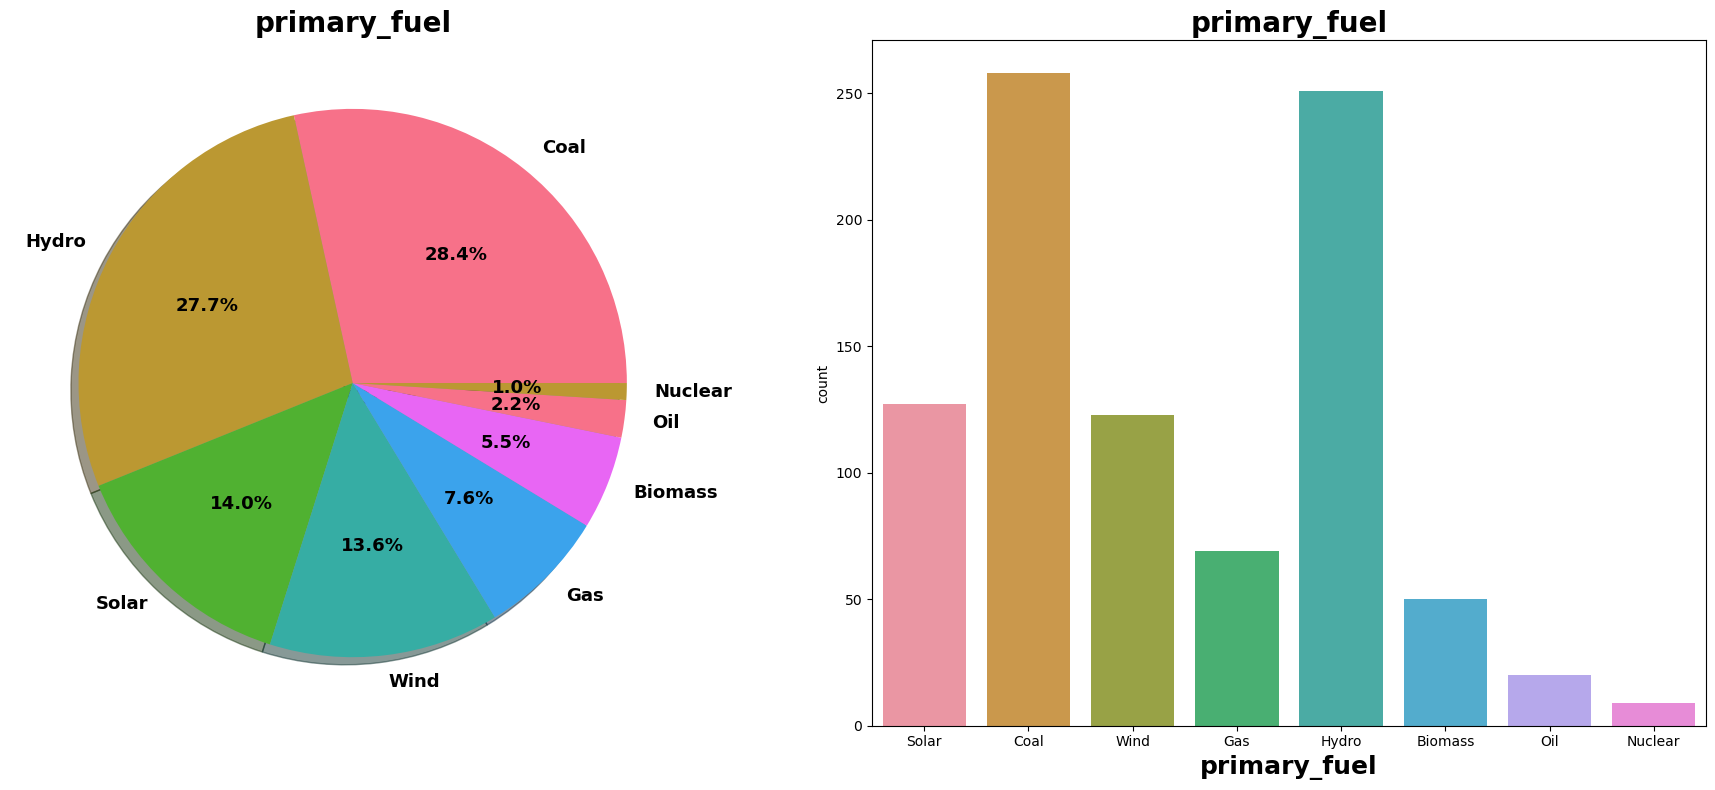

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontweight': 'bold', 'fontsize':13}, ax=ax[0],shadow=True)

ax[0].set_title('primary_fuel',fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
sns.countplot(x='primary_fuel', data=data,ax=ax[1])
ax[1].set_title('primary_fuel', fontsize=20,fontweight='bold')
ax[1].set_xlabel("primary_fuel", fontsize=18, fontweight='bold')
plt.show()

In [20]:
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

From the above observation, we can say that

* Maximum Numbers of powerplant are coal based powerplant followed by hydro energy based powerplants.
* Around 40% powerplant are Unconventional powerplant mainly based on Non Renewable energy resources.

Now let check sector wise capacity.

In [21]:
data['capacity_mw'].groupby(data["primary_fuel"]).agg([sum])

sum
primary_fuel            
Biomass         1003.260
Coal          205839.220
Gas            25172.506
Hydro          46441.770
Nuclear         8780.000
Oil             1778.840
Solar           2757.500
Wind            4111.850

#### Out of Total power generation maximum power is generated from coal.

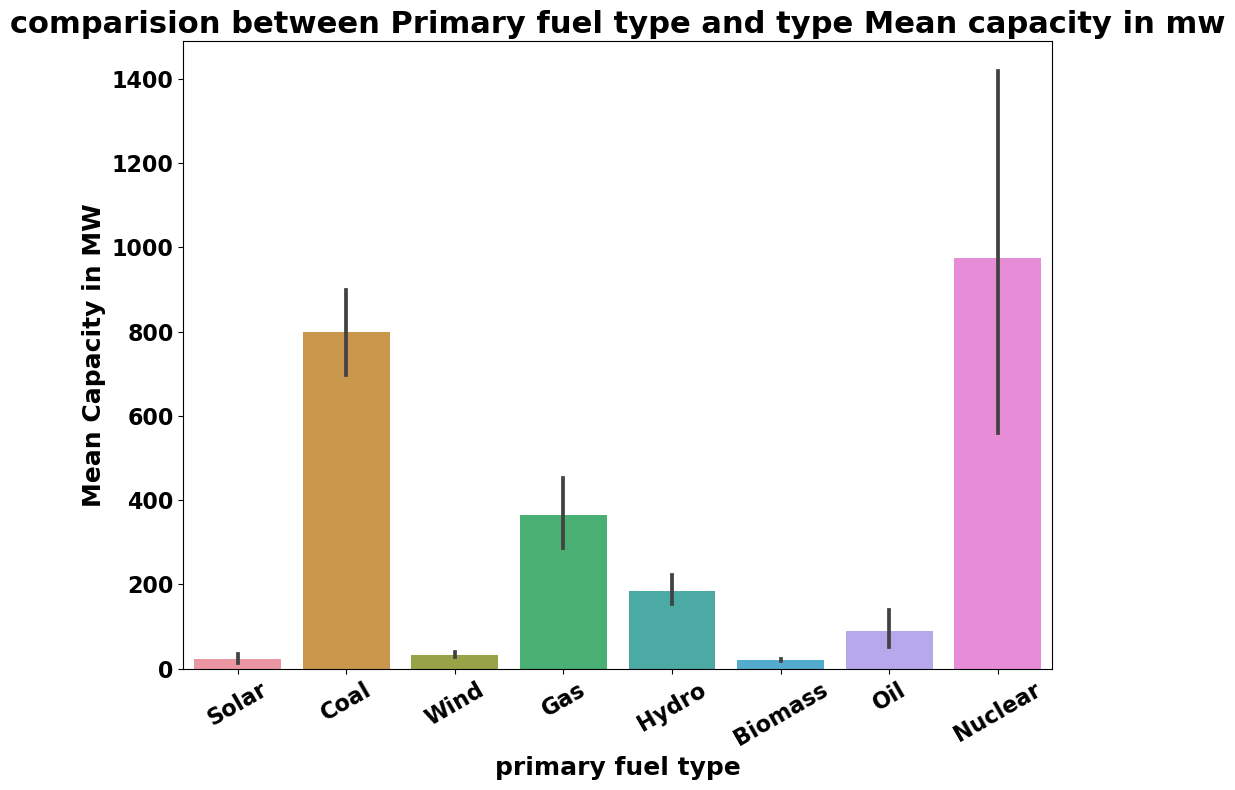

In [23]:
#Lets check the relation between primary_fuel and Average Capacity_mw

plt.figure(figsize=(10,8))
y = data["capacity_mw"]
p = sns.barplot(x= 'primary_fuel', y ='capacity_mw', data = data)
plt.title('comparision between Primary fuel type and type Mean capacity in mw',fontsize=22, fontweight='bold')
p.set_xlabel('primary fuel type', fontsize=18,fontweight='bold')
p.set_ylabel('Mean Capacity in MW', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=30)
plt.yticks(fontsize=16,fontweight = 'bold')
plt.show()

#### There are only 9 Nuclear powerplant so its means Capacity is higher.**

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

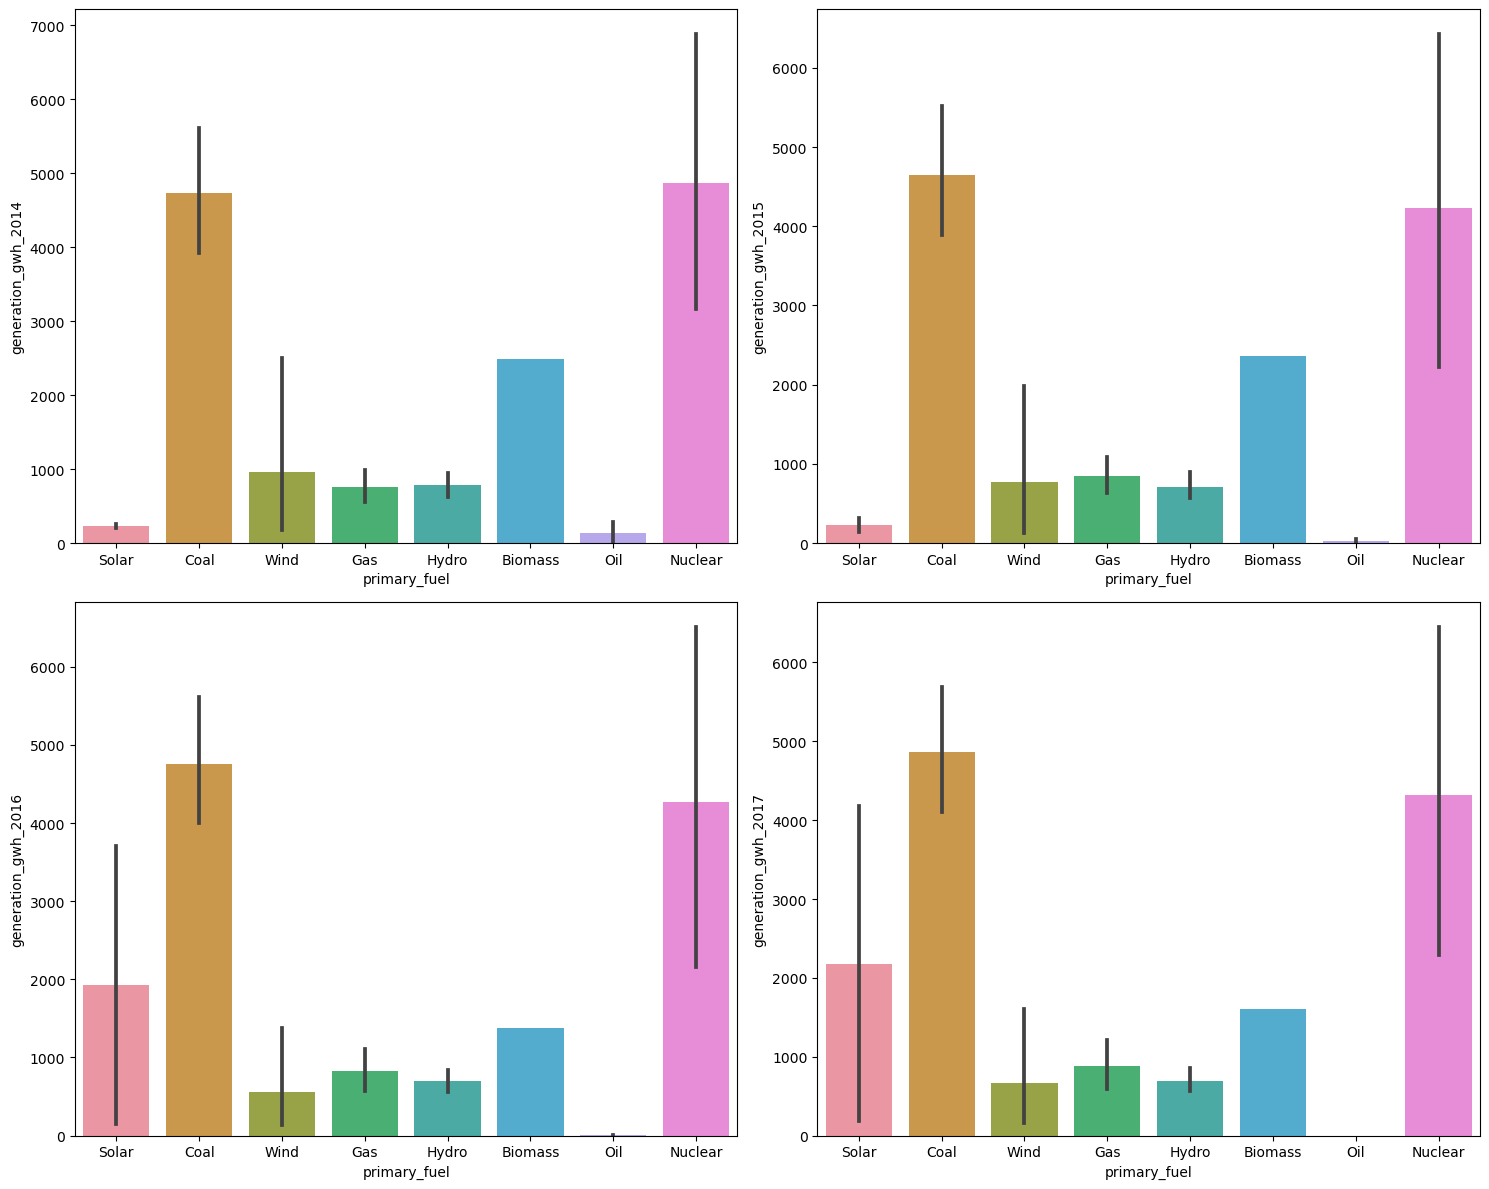

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel', y = 'generation_gwh_2014', ax=axes[0,0],data=data)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel', y = 'generation_gwh_2015', ax=axes[0,1],data=data)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel', y = 'generation_gwh_2016', ax=axes[1,0],data=data)

# Checking generation growth in 2017
sns.barplot(x='primary_fuel', y = 'generation_gwh_2017', ax=axes[1,1],data=data)

# Location V/S Primary Fuel

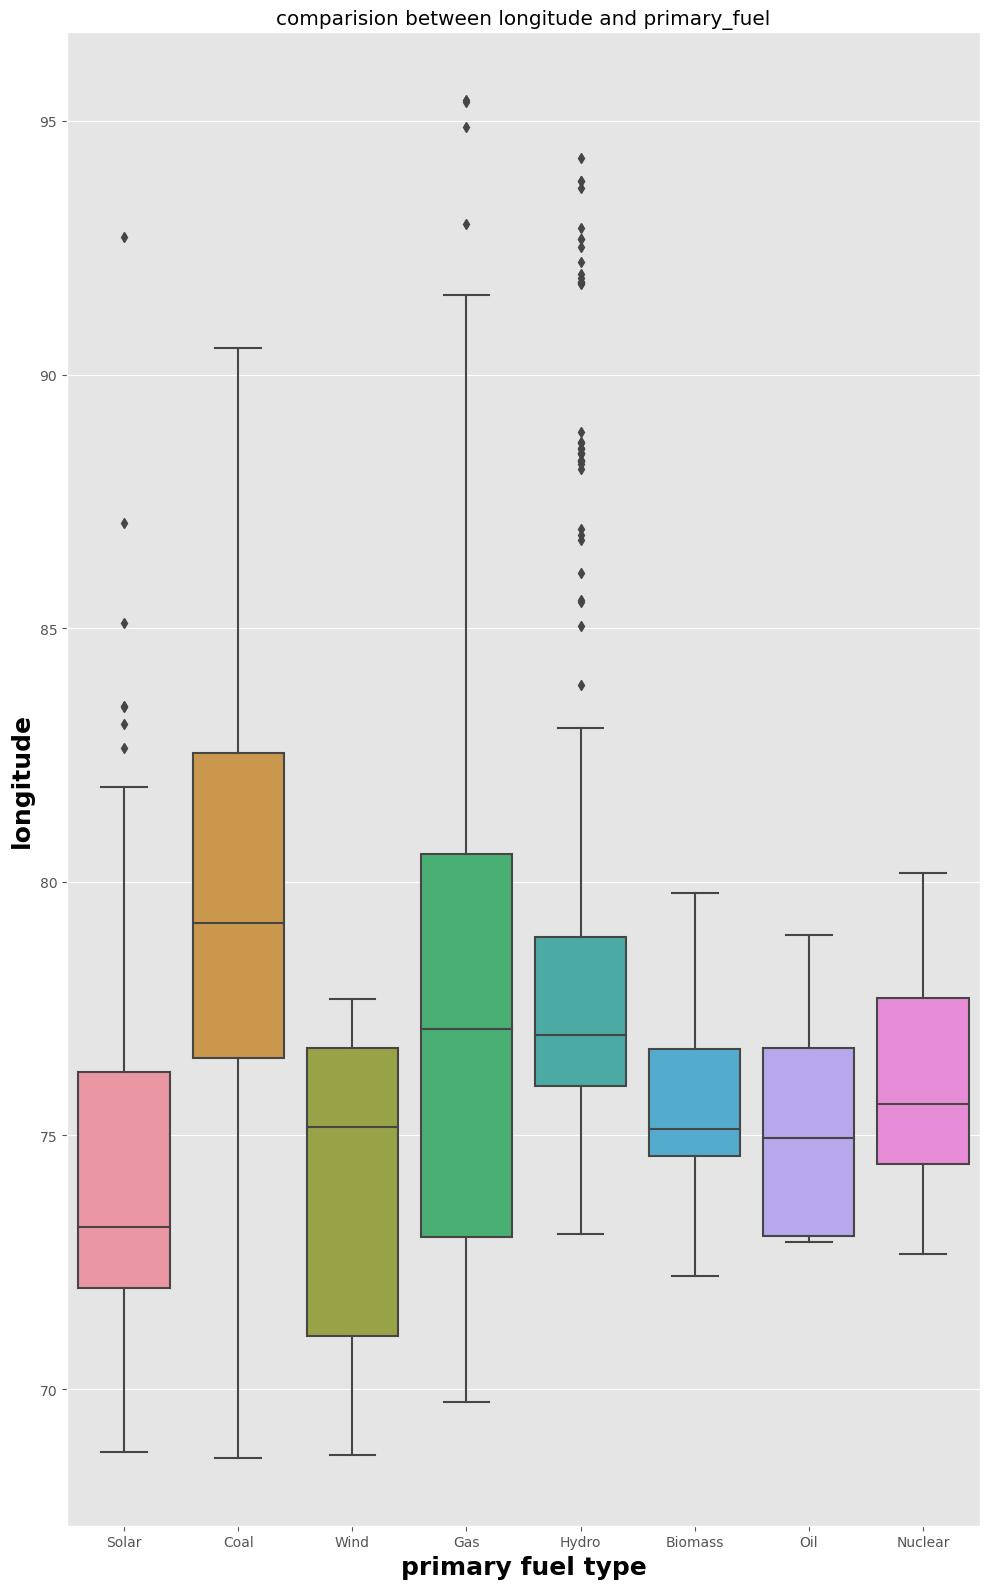

In [25]:
plt.figure(figsize=[10,16])
plt.style.use('ggplot')
plt.title('comparision between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y='longitude',data=data)
a.set_xlabel('primary fuel type', fontsize = 18, fontweight='bold')
a.set_ylabel('longitude', fontsize=18, fontweight='bold')
plt.show()

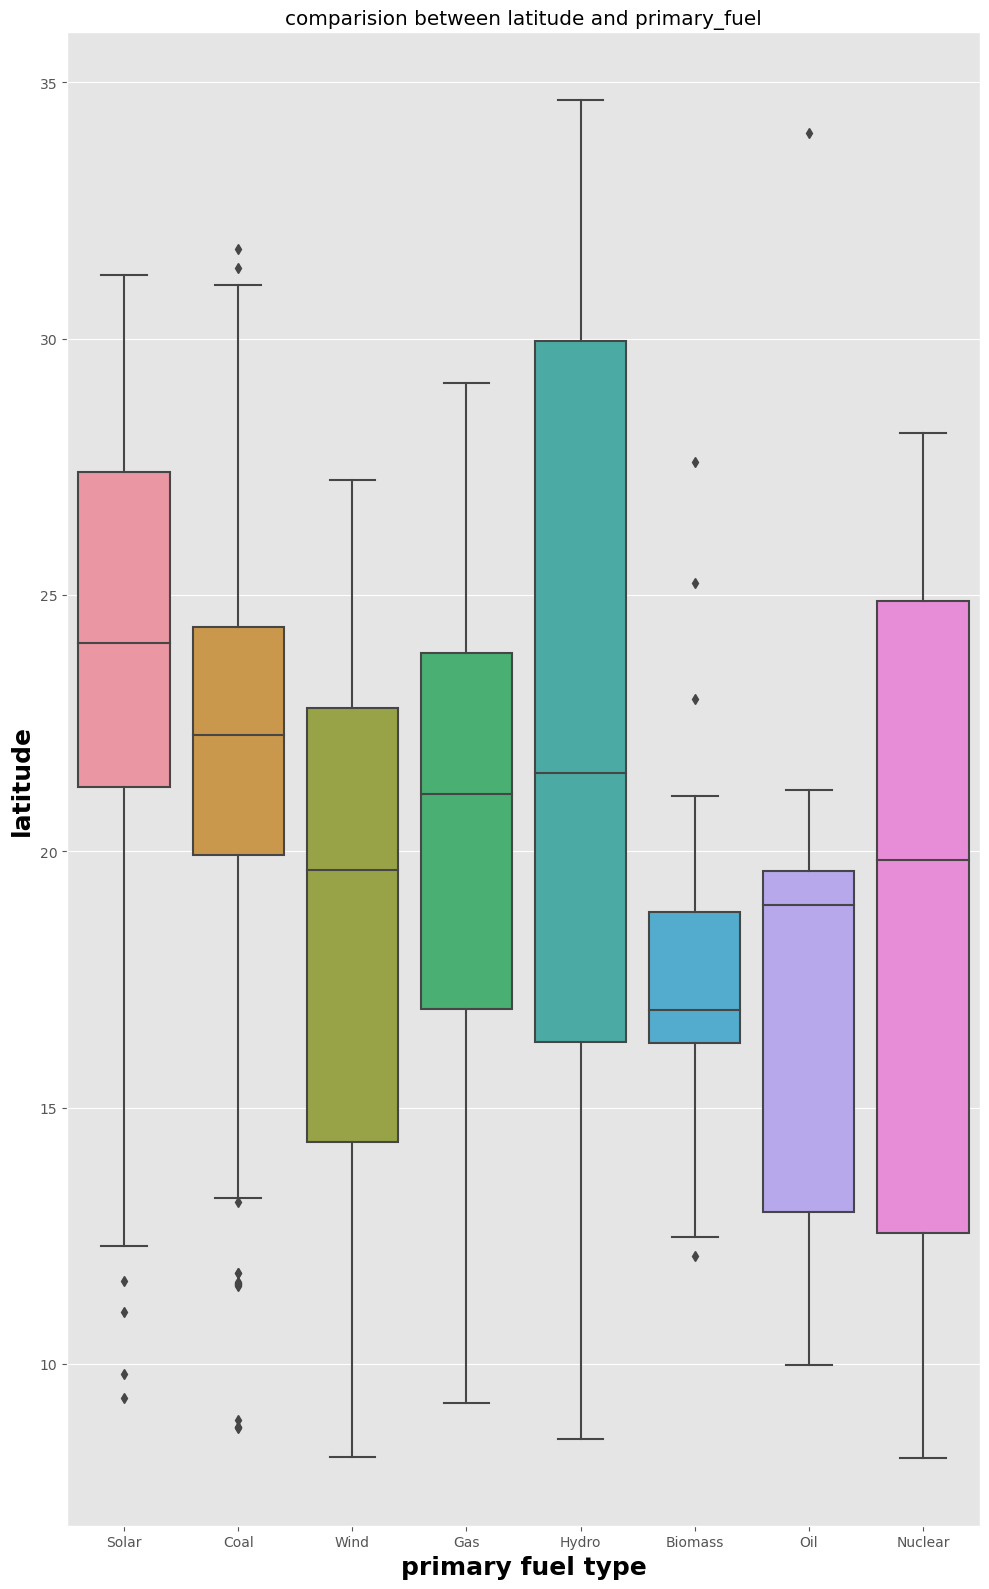

In [26]:
plt.figure(figsize=[10,16])
plt.style.use('ggplot')
plt.title('comparision between latitude and primary_fuel')
a = sns.boxplot(x='primary_fuel',y='latitude',data=data)
a.set_xlabel('primary fuel type', fontsize = 18, fontweight='bold')
a.set_ylabel('latitude', fontsize=18, fontweight='bold')
plt.show()

From the above observation, we can say that

* Location is important features specially for numerical powerplants. These plants lies in between 15 to 25 latitude and longitude range of 75 to 88 degree.
* We can also see solar powerplant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

# Location V/S Capacity

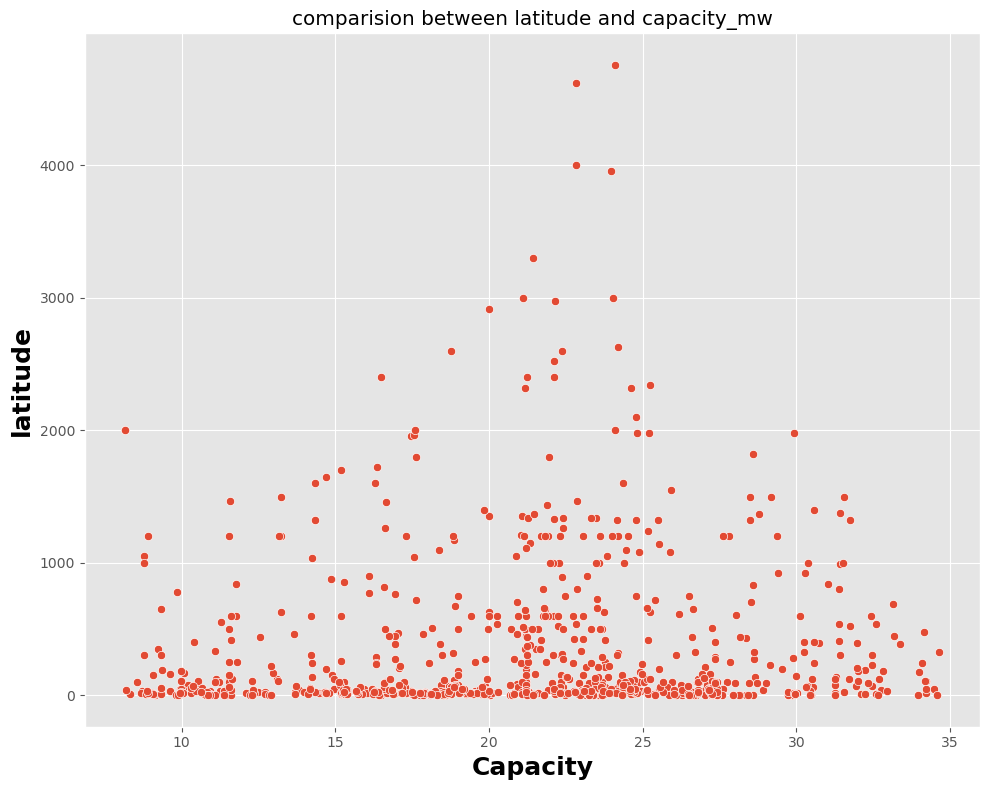

In [27]:
plt.figure(figsize=[10,8])
plt.style.use('ggplot')
plt.title('comparision between latitude and capacity_mw')
a = sns.scatterplot(x='latitude',y='capacity_mw',data=data)
a.set_xlabel('Capacity', fontsize = 18, fontweight='bold')
a.set_ylabel('latitude', fontsize=18, fontweight='bold')
plt.show()

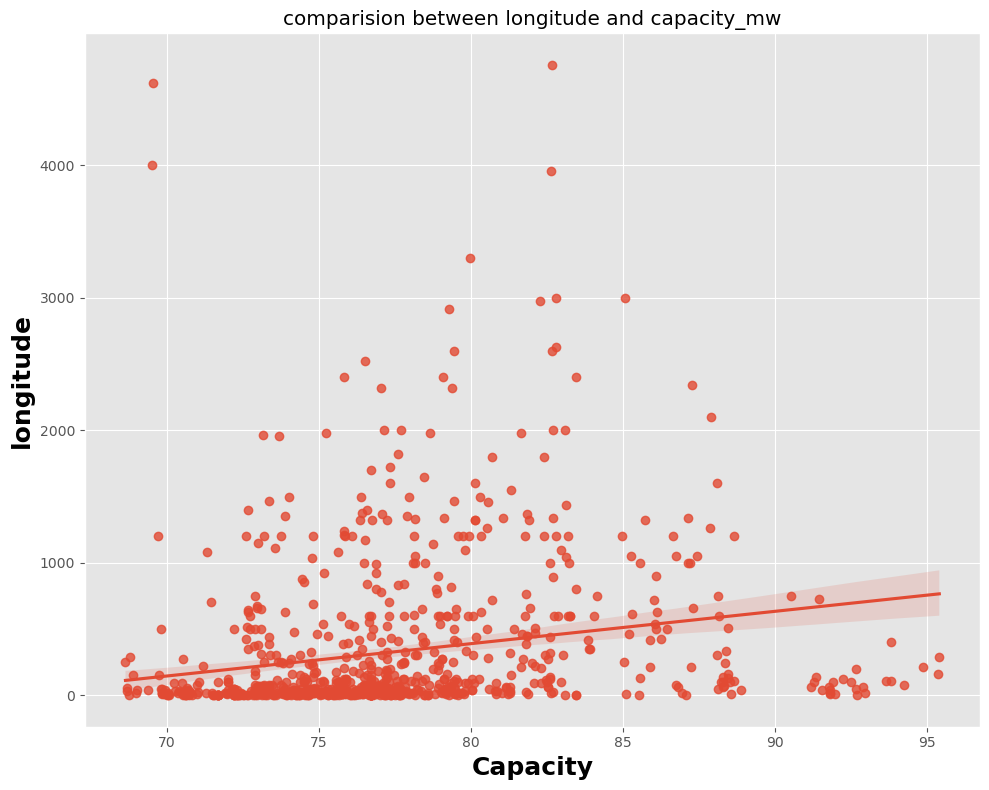

In [28]:
plt.figure(figsize=[10,8])
plt.style.use('ggplot')
plt.title('comparision between longitude and capacity_mw')
a = sns.regplot(x='longitude',y='capacity_mw',data=data)
a.set_xlabel('Capacity', fontsize = 18, fontweight='bold')
a.set_ylabel('longitude', fontsize=18, fontweight='bold')
plt.show()

#### No Significant insights gained from above plots.

# Commision age v/s primary fuel


In [29]:
# Let's extract power plant age from commisioning year by subtracting it from the years 2018

data['power_plant_age'] = 2018 - data['commissioning_year']
data.drop(columns=['commissioning_year'],axis = 1, inplace = True)

In [30]:
print('The oldest powerplant Age :',data.power_plant_age.max())
print('The youngest powerplant Age :',data.power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [31]:
data.loc[data.power_plant_age==91]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
728  SIVASAMUNDRUM         42.0   12.3082     77.165        Hydro         NaN   

                            source geolocation_source  generation_gwh_2013  \
728  Central Electricity Authority                WRI                  NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
728            220.82035             215.3777             144.4143   

     generation_gwh_2017  generation_gwh_2018 generation_gwh_2019  \
728            175.92595            282.76905                 NaN   

            generation_data_source  power_plant_age  
728  Central Electricity Authority             91.0

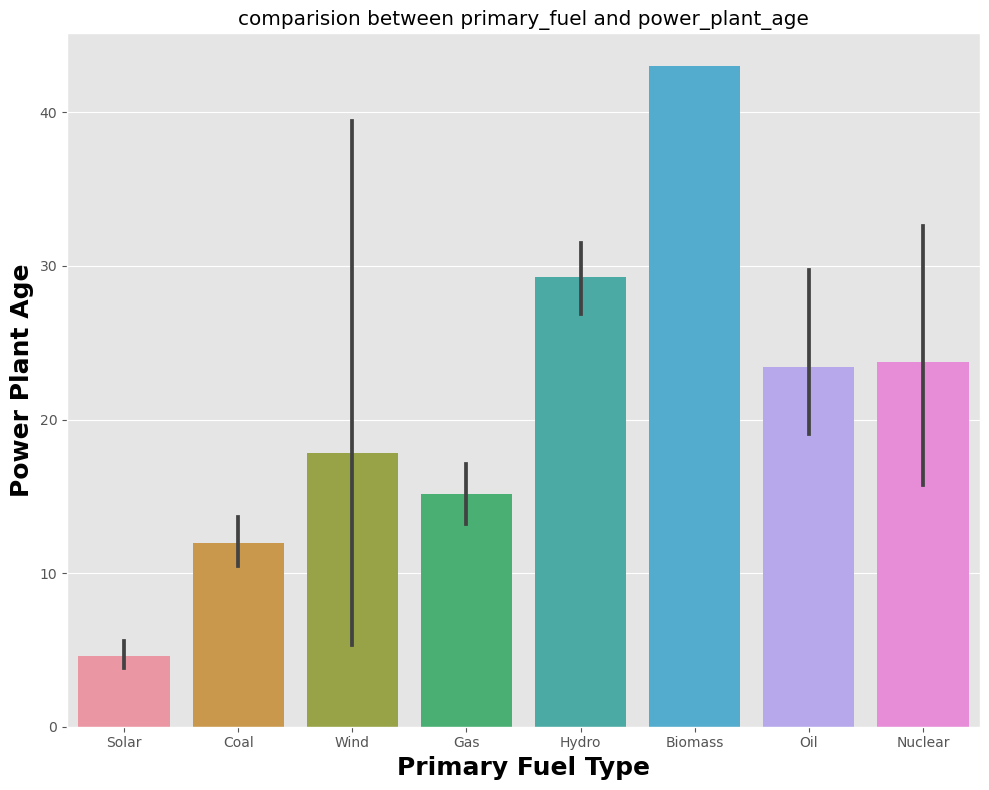

In [32]:
plt.figure(figsize=[10,8])
plt.title('comparision between primary_fuel and power_plant_age')
a = sns.barplot(x='primary_fuel',y='power_plant_age',data=data)
a.set_xlabel('Primary Fuel Type', fontsize = 18, fontweight='bold')
a.set_ylabel('Power Plant Age', fontsize=18, fontweight='bold')
plt.show()

<Axes: title={'center': 'comparision between power_plant_age and capacity_mw'}, xlabel='power_plant_age', ylabel='capacity_mw'>

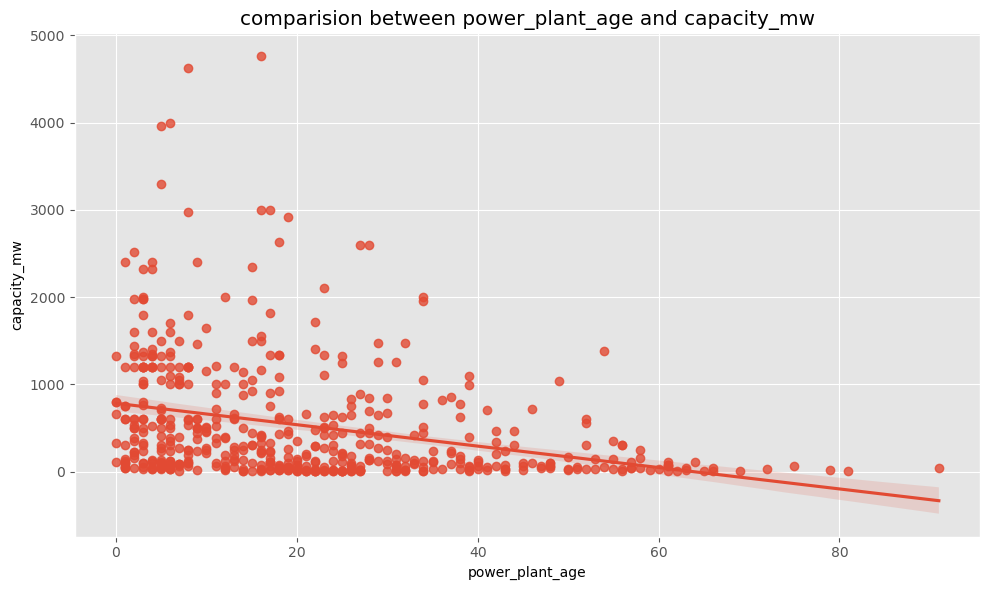

In [33]:
#Let's check how the power_plant_age affects the capacity of the power plant

plt.figure(figsize=[10,6])
plt.title('comparision between power_plant_age and capacity_mw')
sns.regplot(x='power_plant_age',y='capacity_mw',data=data)

* There is negative linear regression between features and label.
* We can say that the capacity of older plants is very less than compared to the power plant which are stated recently.

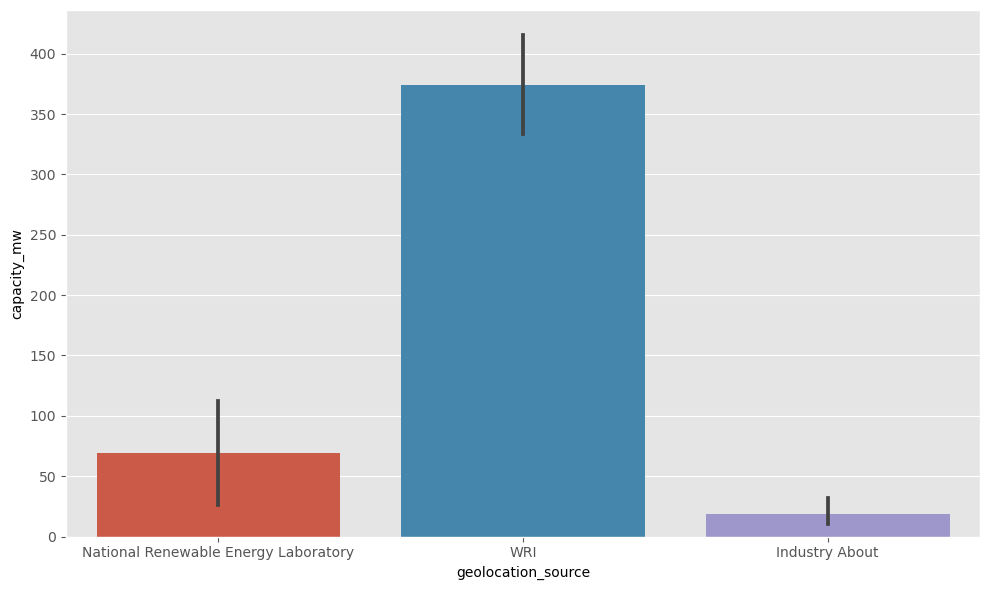

In [34]:
#Lets check the relationship between sources and capacity_mw

plt.figure(figsize=(10,6))
sns.barplot(x='geolocation_source',y= 'capacity_mw',data=data)
plt.show()

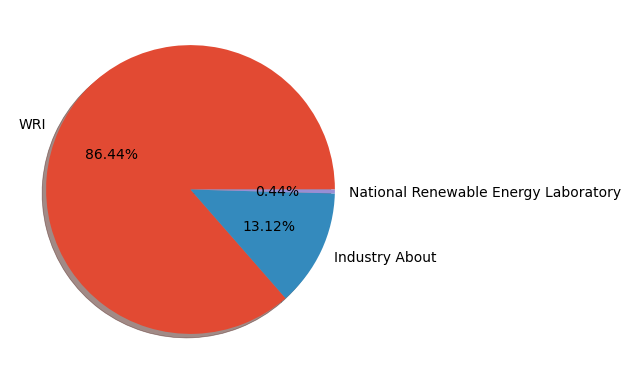

In [35]:
labels = 'WRI','Industry About','National Renewable Energy Laboratory'
fix, ax = plt.subplots(figsize=(6,5))
ax.pie(data['geolocation_source'].value_counts(), labels = labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 MWs. The geological source industry About has less capacity.

# Distribution of features

In [36]:
Numerical=['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
           'generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','power_plant_age']

ValueError: could not convert string to float: 'Central Electricity Authority'

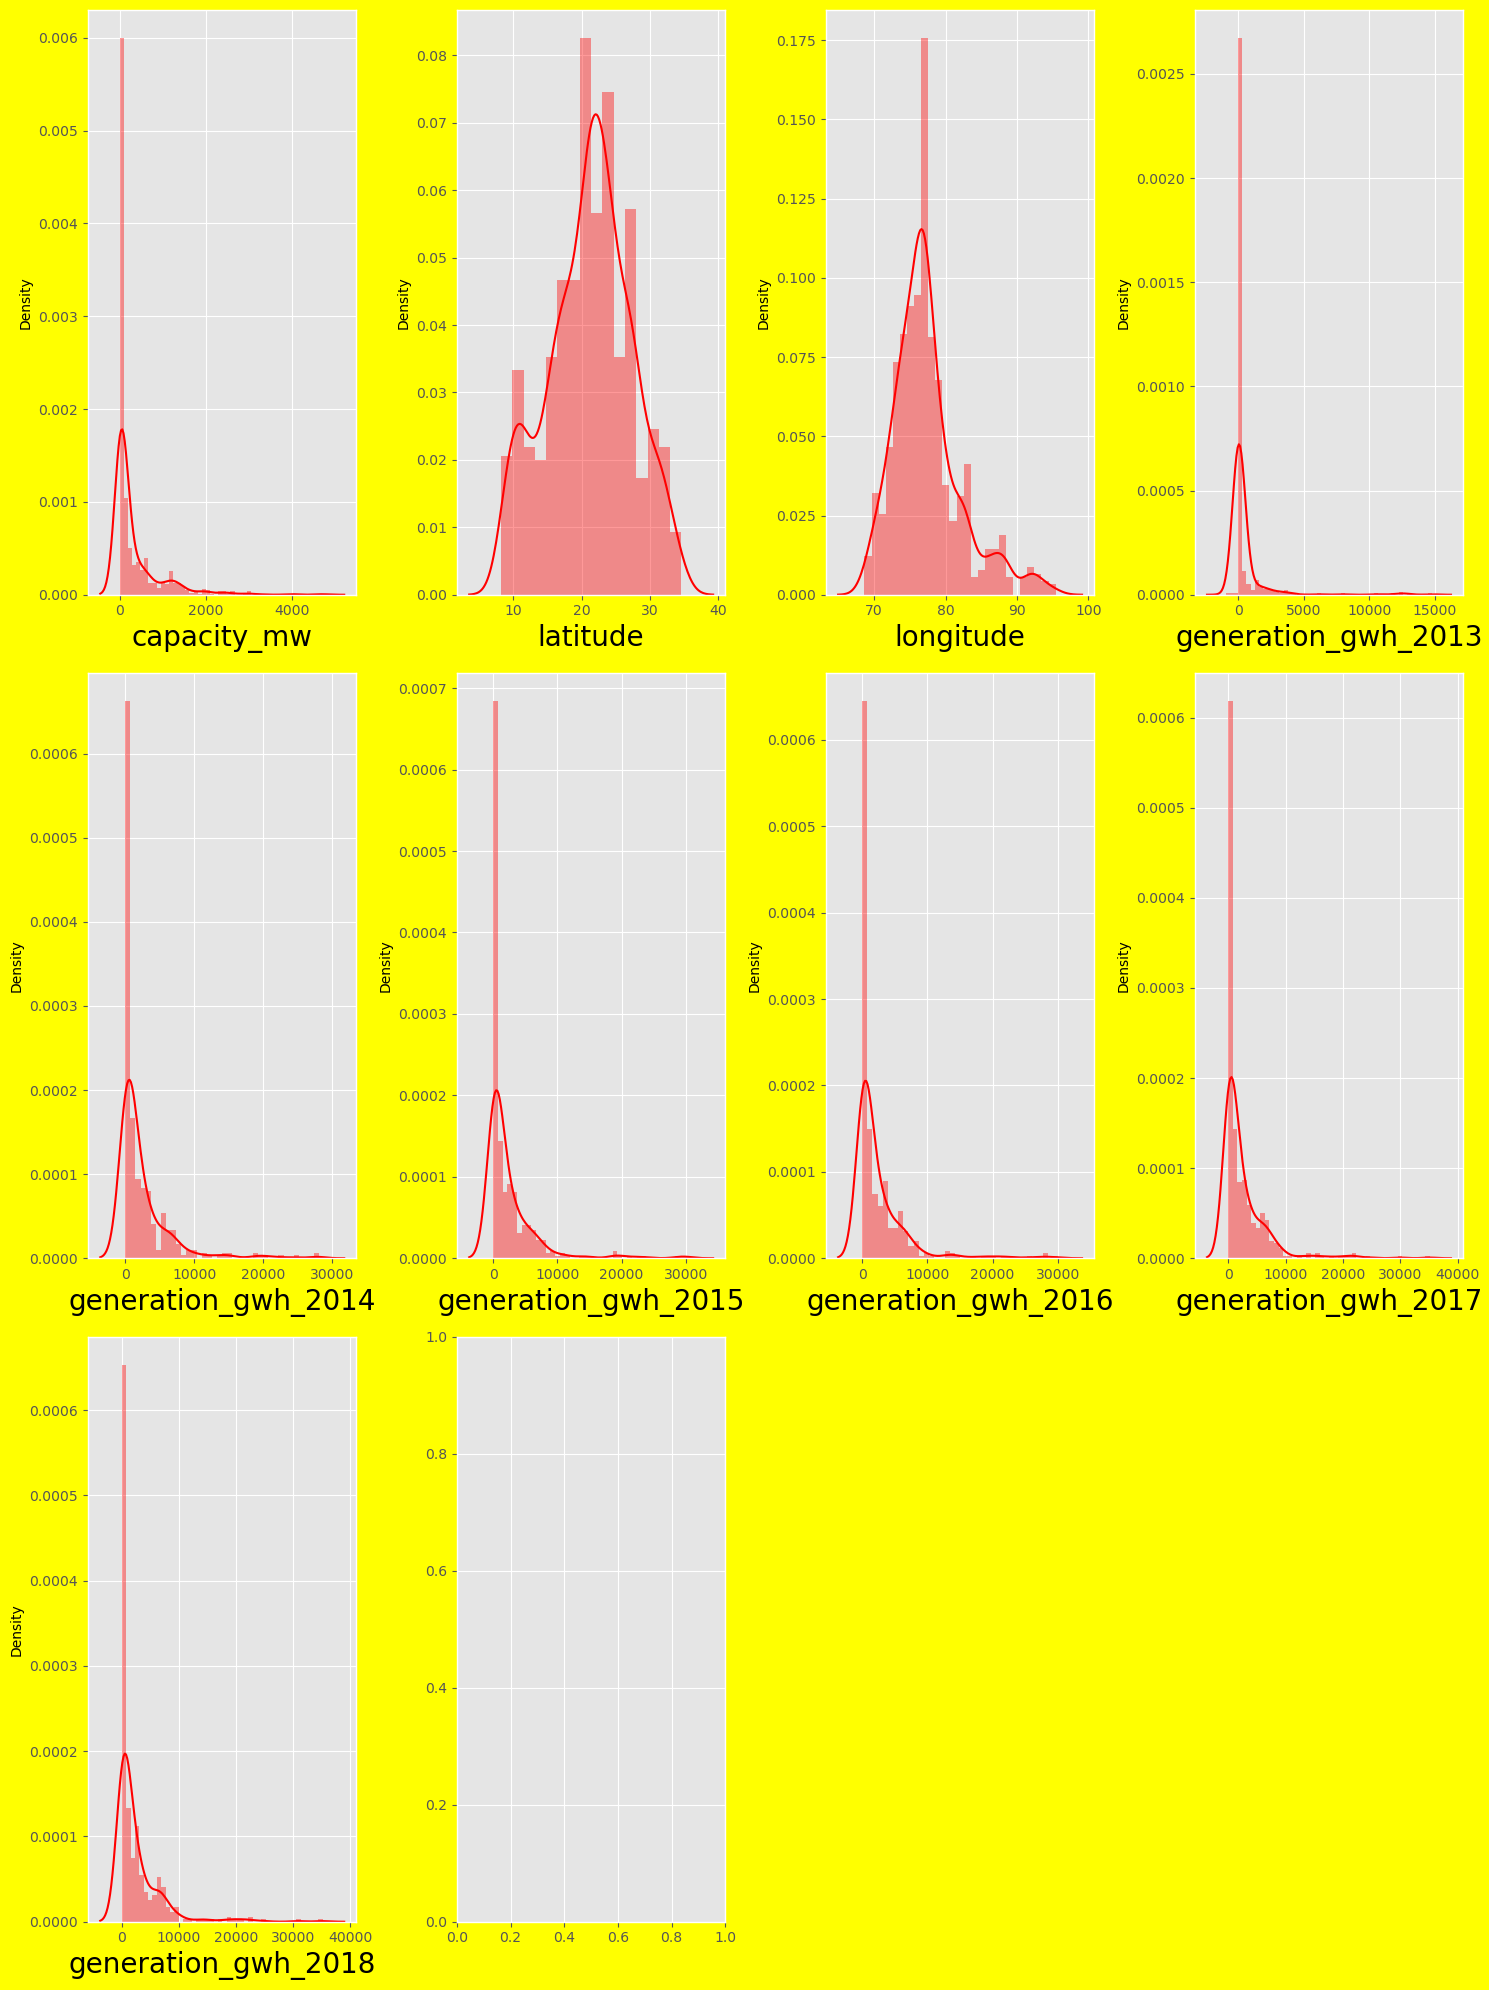

In [37]:
# checking how the data has been distributed in each column

plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber = 1
for col in Numerical:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the Above observation, we can say that

* from the above distributional we can observe that the data is not normally distributed in all the columns except latitude and longitude.
* In most of the column the mean is greater than the median which means they are skewed to right.
* We will remove the skewness in all these columns expect the label later.

<Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>

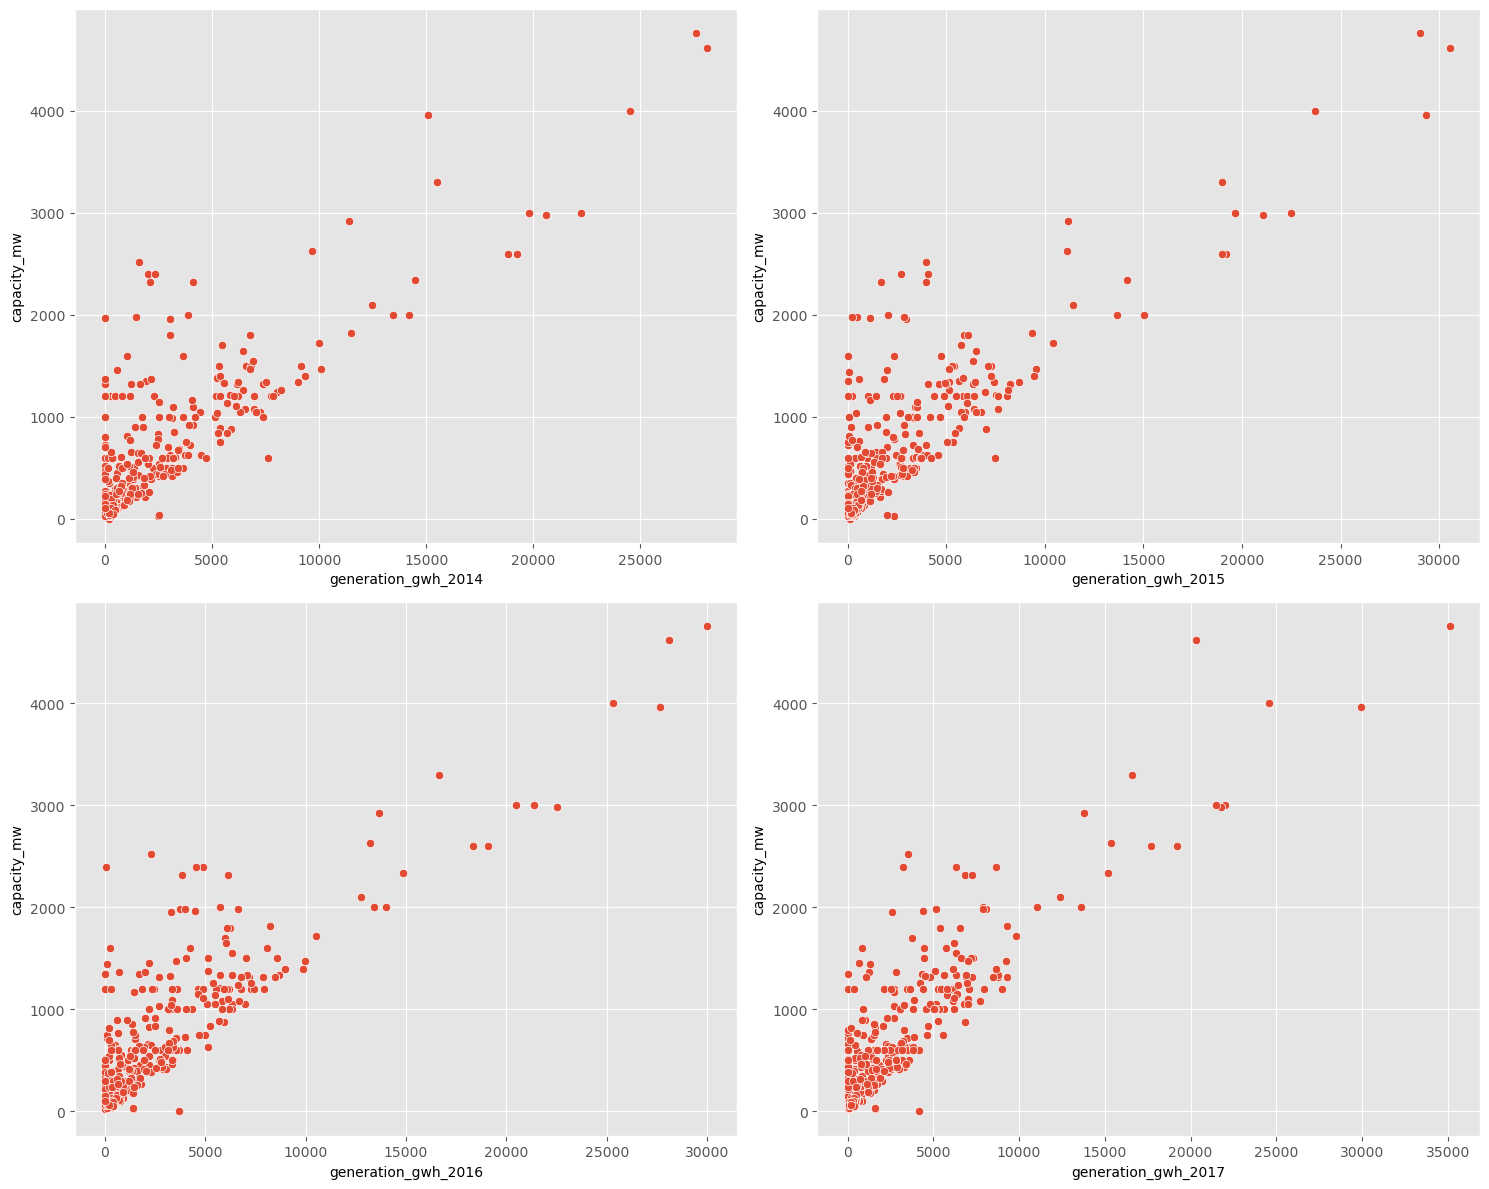

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot( x = 'generation_gwh_2014',y='capacity_mw', ax=axes[0,0],data=data)

# Checking generation growth in 2015
sns.scatterplot( x = 'generation_gwh_2015',y='capacity_mw', ax=axes[0,1],data=data)

# Checking generation growth in 2016
sns.scatterplot(x = 'generation_gwh_2016',y='capacity_mw', ax=axes[1,0],data=data)

# Checking generation growth in 2017
sns.scatterplot(x = 'generation_gwh_2017',y='capacity_mw', ax=axes[1,1],data=data)

From the above observation, we can see that

* There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
* As the electricity generation growth increase, the capacity of plant also increases.

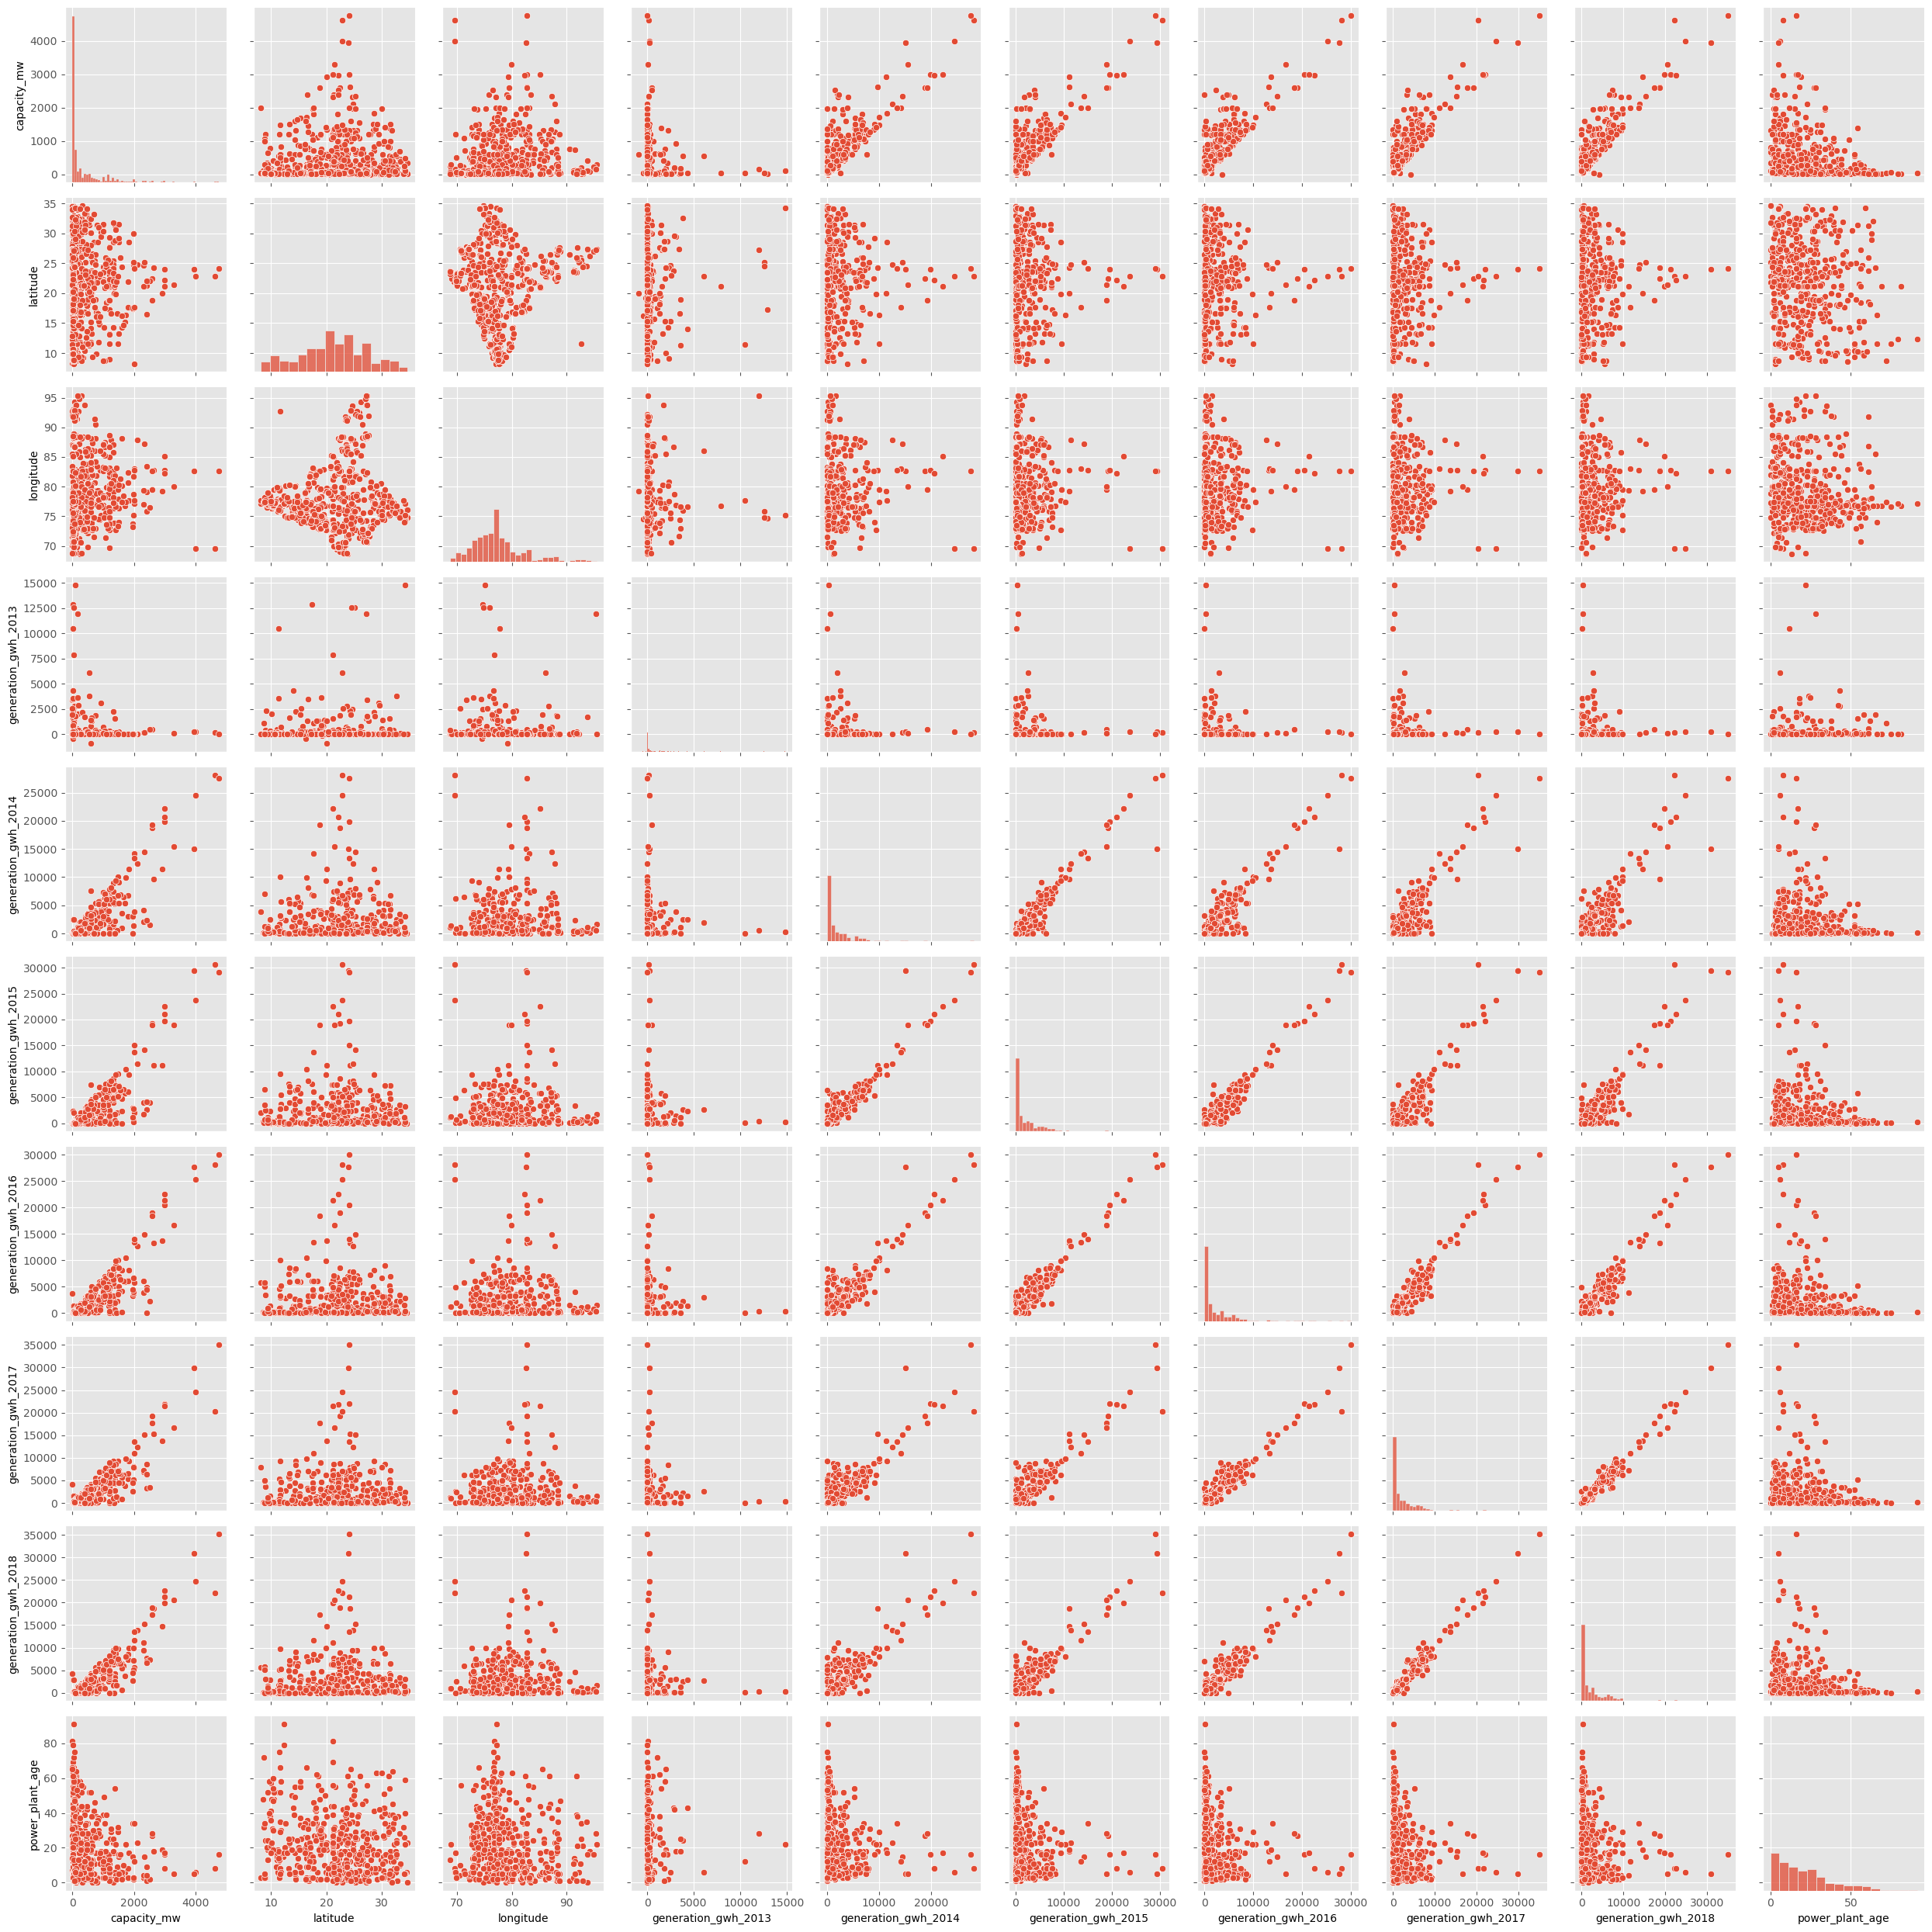

In [39]:
#Checking the pairwise relation between the features and label capacity in MW.

sns.pairplot(data)

From the above observation, we can say that

* Most of the features have strong linear relationship and correlation with each other.
* From the plot we can observe the outlier in some of the columns
* We can see histogram on the diagonal.

# Encoding categorical data

In [40]:
data.drop(columns = ['name'], axis = 1,inplace=True)

In [41]:
data.drop(columns=['generation_data_source'],axis=1, inplace = True)

In [42]:
category =['primary_fuel','other_fuel1','source','geolocation_source']

In [43]:
#using label encoder on target variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    data[i]=le.fit_transform(data[i])
data.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  source  \
0          2.5   28.1839    73.2407             6            3     109   
1         98.0   24.7663    74.6090             1            3     174   
2         39.2   21.9038    69.3732             7            3      21   
3        135.0   23.8712    91.3602             2            3      22   
4       1800.0   21.9603    82.4091             1            2      22   

   geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0                   1                  NaN                  NaN   
1                   2                  NaN                  NaN   
2                   2                  NaN                  NaN   
3                   2              2.41461           617.789264   
4                   2                  NaN          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018 generation_gwh_2019  power_plant_age  
0                  NaN                 NaN              7.0  
1                  NaN                 NaN              NaN  
2                  NaN                 NaN              NaN  
3           626.239128                 NaN             14.0  
4          7279.000000                 NaN              3.0

# Outliers detection and removal

ValueError: could not convert string to float: 'Central Electricity Authority'

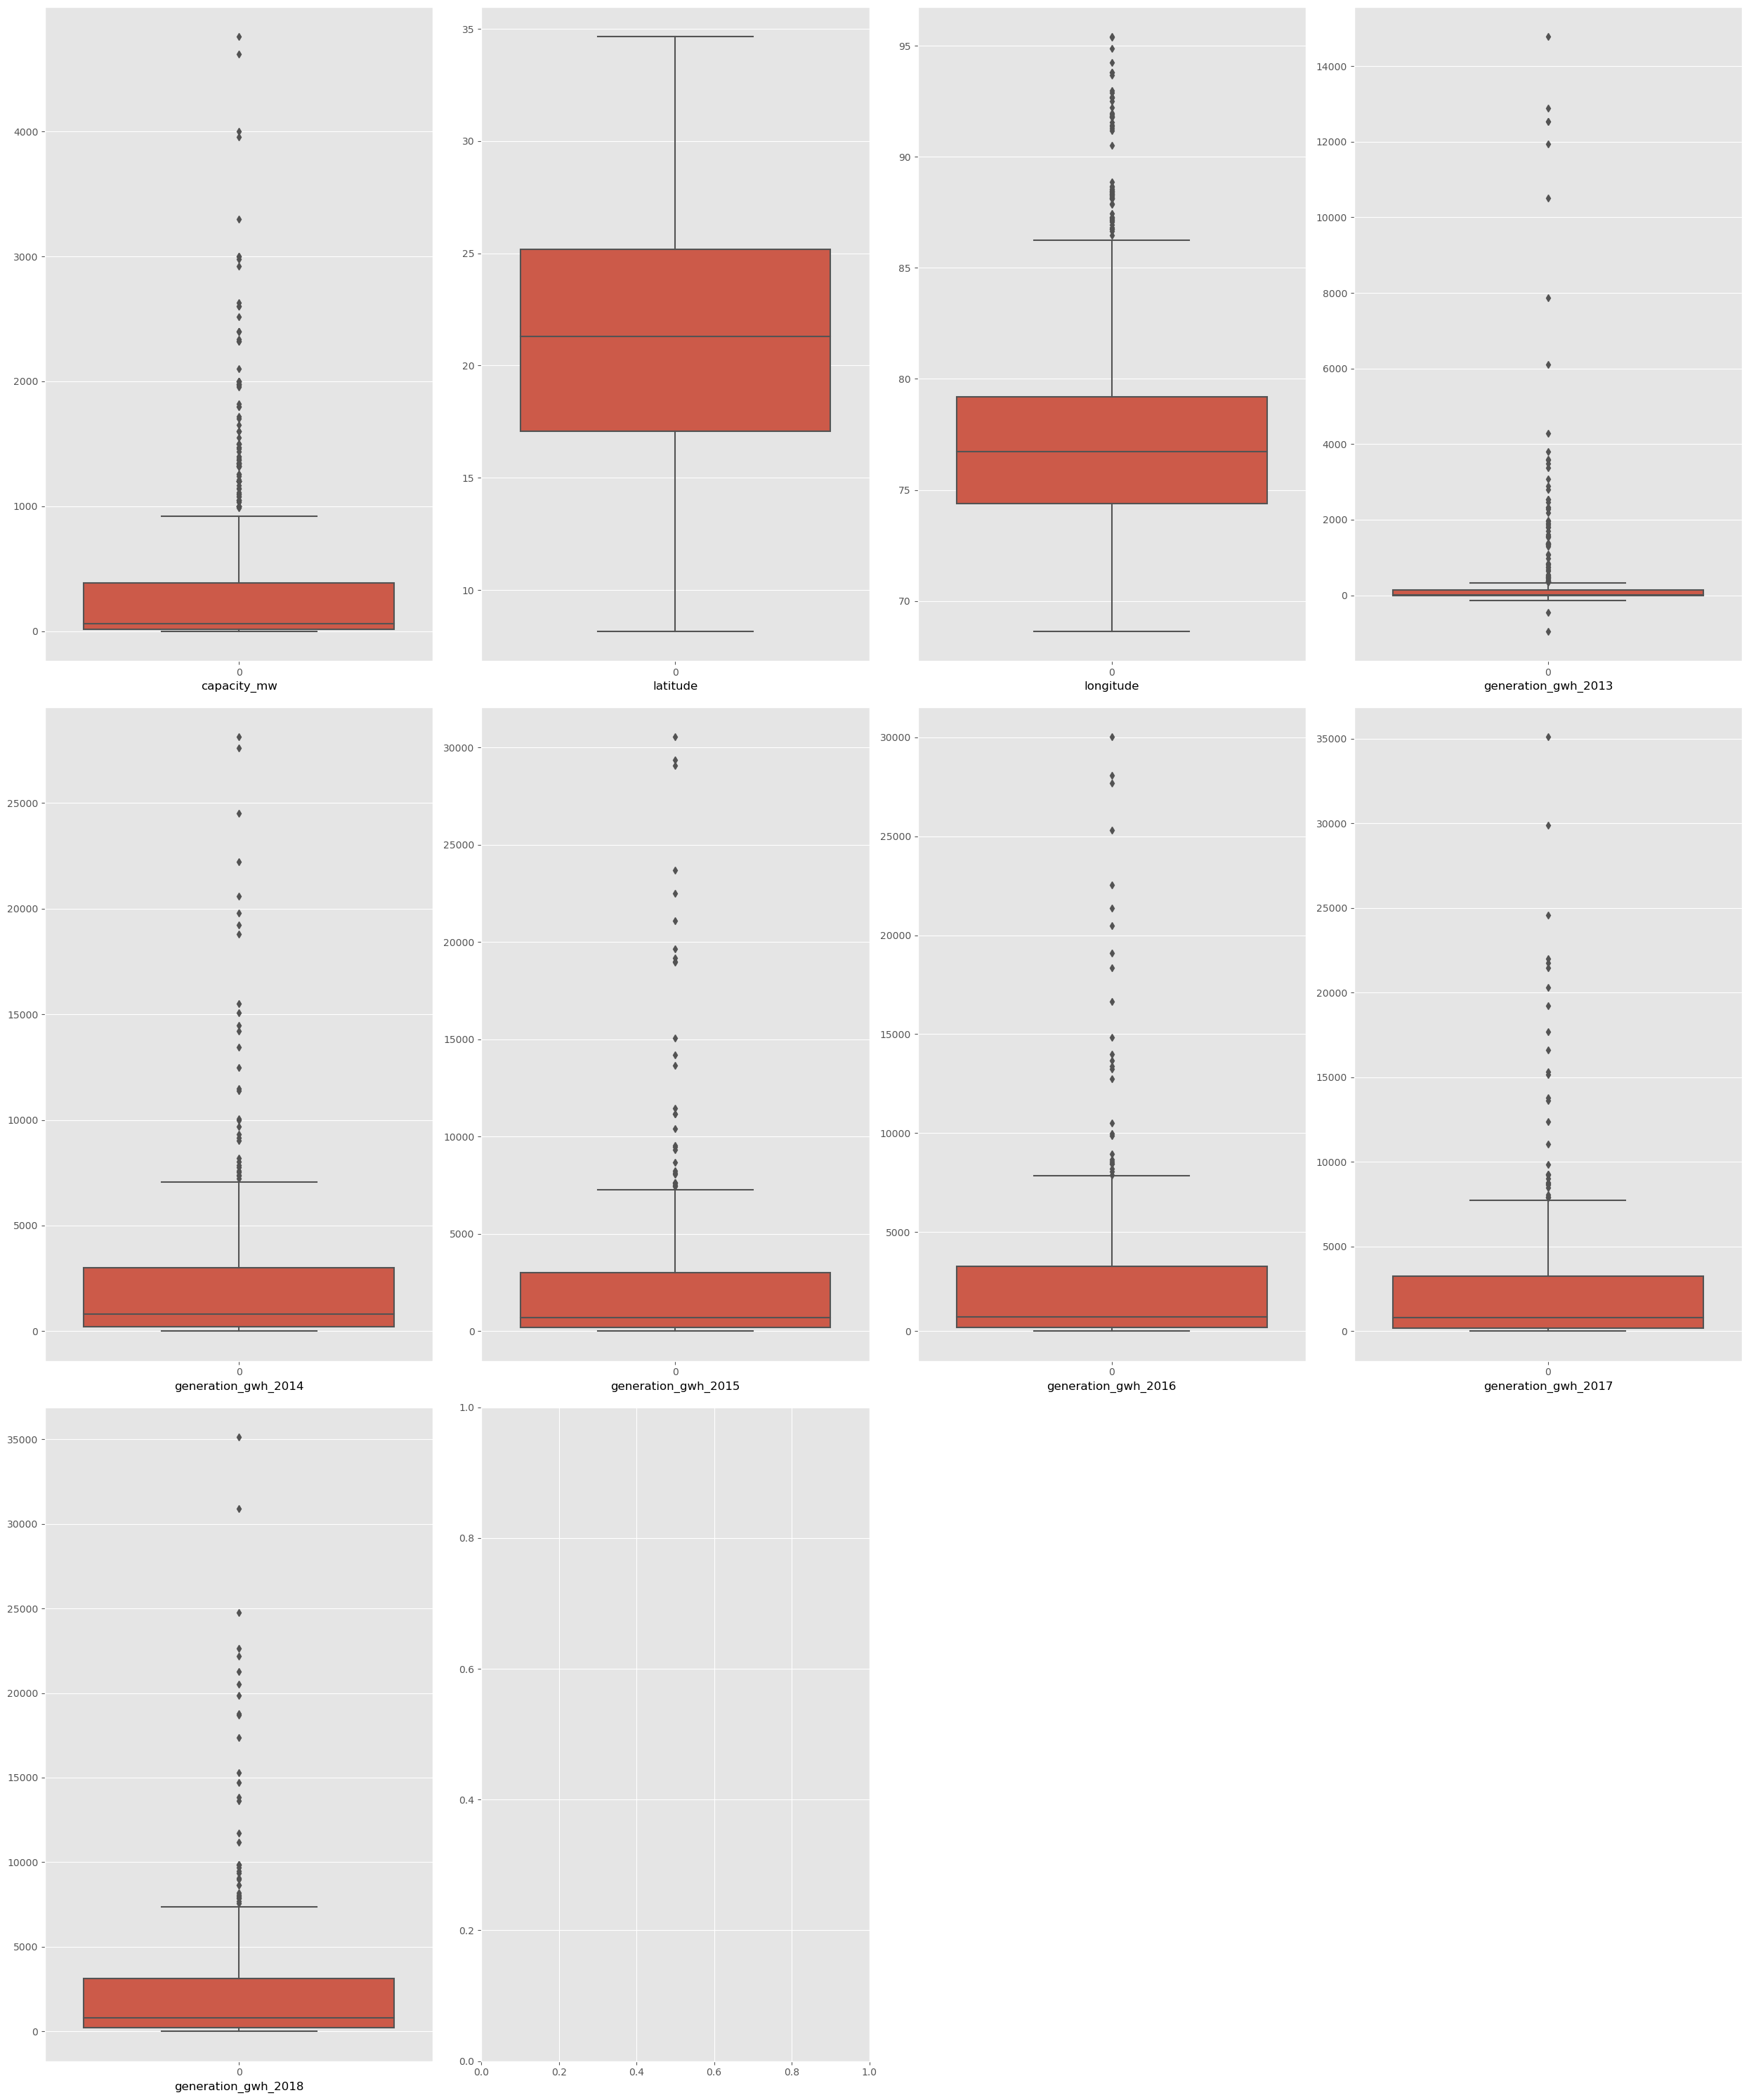

In [44]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Numerical:
    if plotnumber <=12:
        ax = plt.subplot(3,4, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

From the above observation, we can say that 

* There outliers present in the data.
* There are no outliers in lower capping level.
* So we will use Quantile-based flooring and capping techniques.

In [45]:
#Removing unnecessary columns

data.drop(columns=['source','geolocation_source','generation_gwh_2013','generation_gwh_2019'], axis = 1,inplace=True)

In [46]:
kk = data.copy

In [47]:
knk = data.copy()
Q1 =knk.quantile(0)
Q3 = knk.quantile(0.85)
IQR= Q3-Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2014    5252.204663
generation_gwh_2015    5060.733915
generation_gwh_2016    5157.019802
generation_gwh_2017    5579.967750
generation_gwh_2018    5988.440800
power_plant_age          39.000000
dtype: float64


In [48]:
haa = knk[~((knk<(Q1-1.5*IQR))).any(axis=1)]
print(data.shape)

(907, 11)


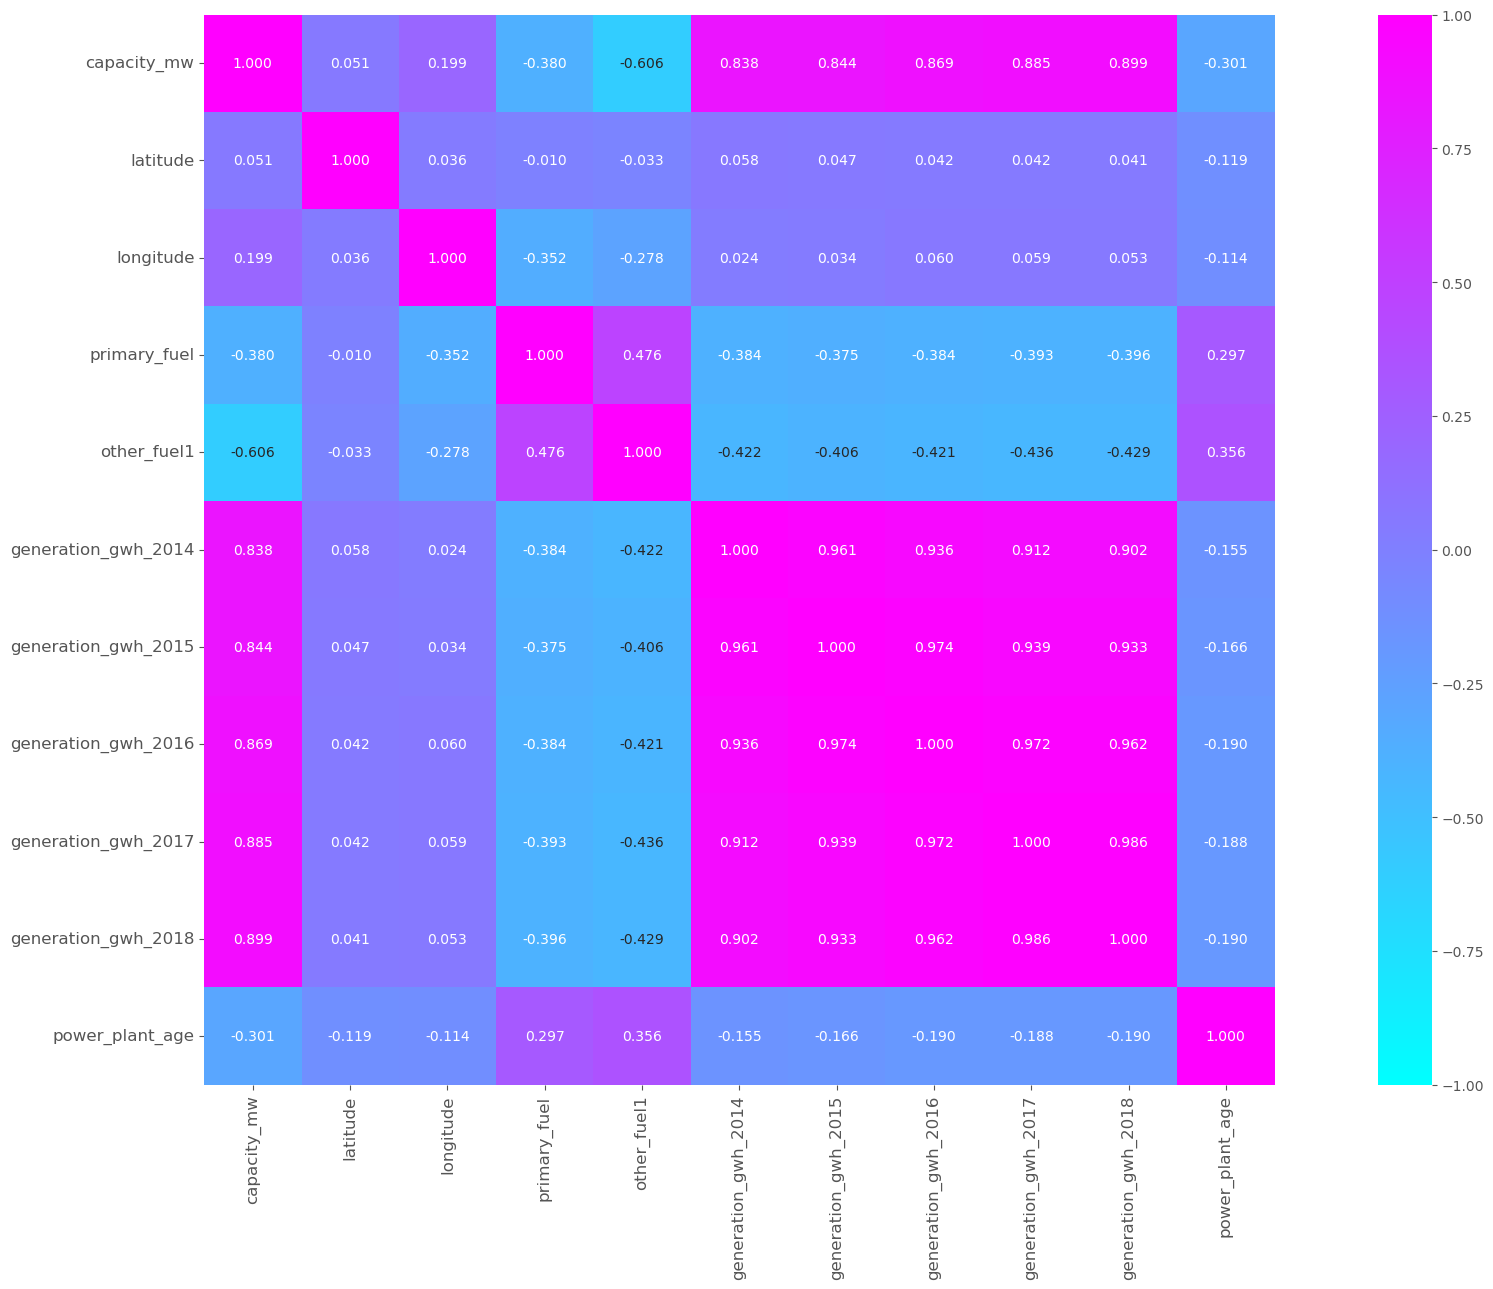

In [49]:
plt.figure(figsize=(21,13))
sns.heatmap(haa.corr(),vmin=-1, vmax=1,annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap = "cool")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

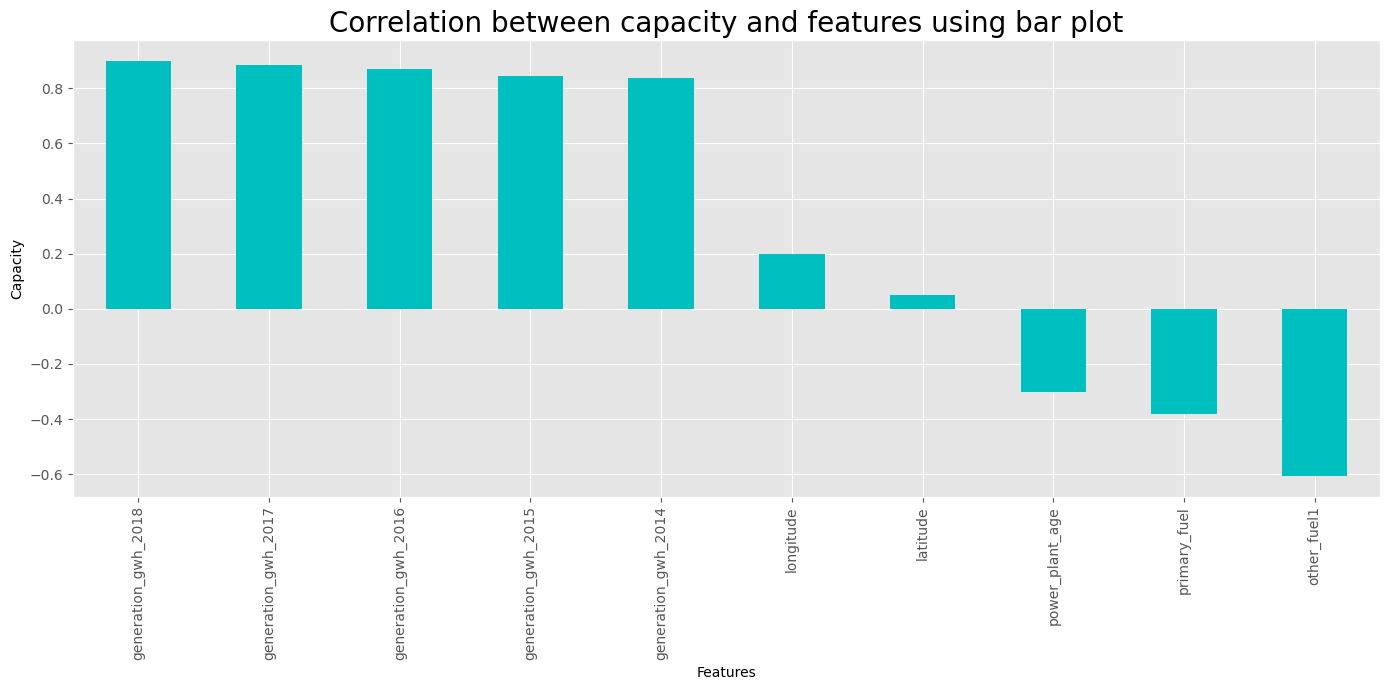

In [50]:
plt.figure(figsize=(14,7))
haa.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize = 10)
plt.title('Correlation between capacity and features using bar plot', fontsize = 20)
plt.show()

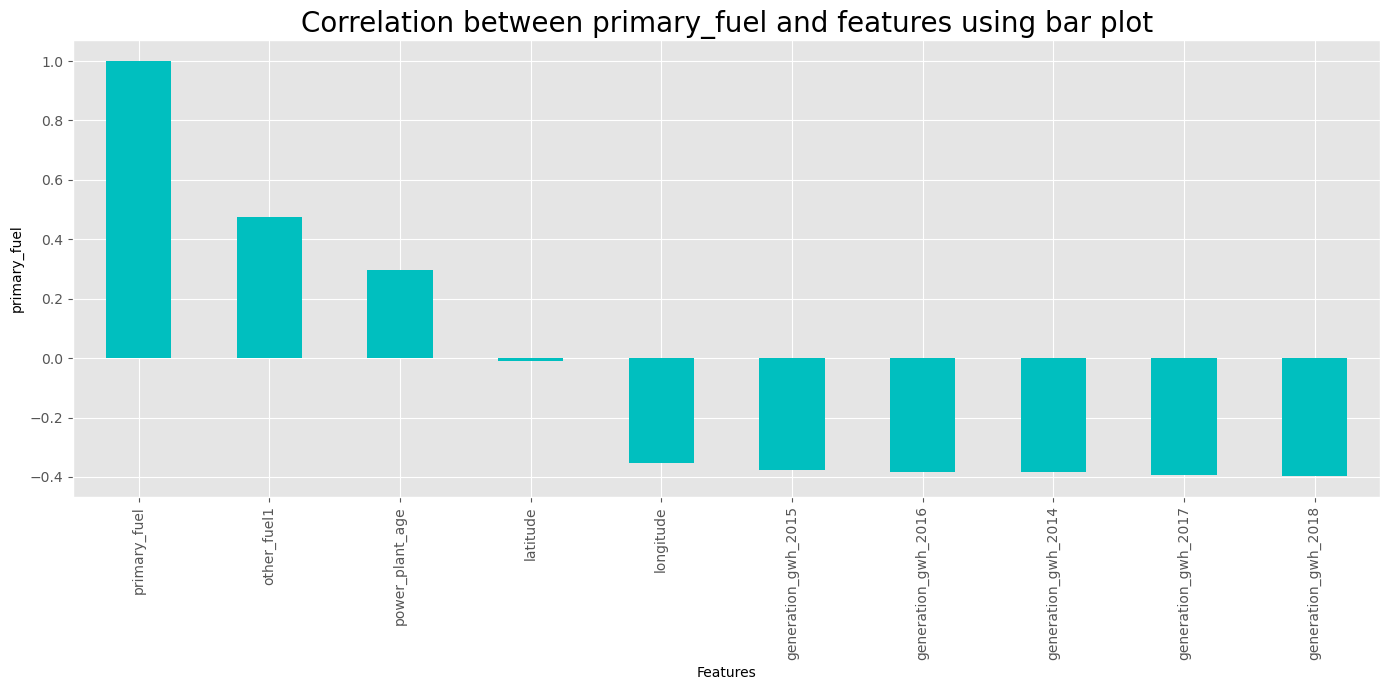

In [51]:
plt.figure(figsize=(14,7))
haa.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize = 10)
plt.title('Correlation between primary_fuel and features using bar plot', fontsize = 20)
plt.show()

# Skewness

In [52]:
haa.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.472251
other_fuel1           -1.626786
generation_gwh_2014    3.367455
generation_gwh_2015    3.691868
generation_gwh_2016    3.534216
generation_gwh_2017    3.586290
generation_gwh_2018    3.489864
power_plant_age        1.063420
dtype: float64

In [53]:
skew = ['longitude','primary_fuel','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [54]:
haa[skew] = scaler.fit_transform(haa[skew].values)
haa[skew].head()

longitude  primary_fuel  other_fuel1  generation_gwh_2014  \
0  -0.944854      1.171313     0.528455                  NaN   
1  -0.534212     -0.996291     0.528455                  NaN   
2  -2.390933      1.441576     0.528455                  NaN   
3   2.167755     -0.362170     0.528455            -0.172299   
4   1.126913     -0.996291    -1.891705             0.739544   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.032129             0.045048            -0.124814   
4             1.208644             1.228972             1.093963   

   generation_gwh_2018  power_plant_age  
0                  NaN        -0.772176  
1                  NaN              NaN  
2                  NaN              NaN  
3            -0.154763        -0.141869  
4             1.290548        -1.352984

In [55]:
haa.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              0.002675
primary_fuel          -0.047067
other_fuel1           -1.366124
generation_gwh_2014   -0.064506
generation_gwh_2015   -0.071470
generation_gwh_2016   -0.080546
generation_gwh_2017   -0.095808
generation_gwh_2018   -0.099646
power_plant_age       -0.070892
dtype: float64

In [56]:
#We will drop other fuel1 as result of poor correlation and lot of missing value

haa.drop(columns=['other_fuel1'],axis = 1, inplace = True)

In [57]:
#Missing value Imputations of latitude with mean 

haa['power_plant_age']= data['power_plant_age'].fillna(data['power_plant_age'].mean())

# Since we have done with EDA Now its time for removal of missing data

In [58]:
haa.drop(columns=['generation_gwh_2014'],axis =1, inplace= True)
haa.drop(columns=['generation_gwh_2015'],axis =1, inplace= True)
haa.drop(columns=['generation_gwh_2016'],axis =1, inplace= True)
haa.drop(columns=['generation_gwh_2017'],axis =1, inplace= True)
haa.drop(columns=['generation_gwh_2018'],axis =1, inplace= True)

In [59]:
haa.head()

capacity_mw  latitude  longitude  primary_fuel  power_plant_age
0          2.5   28.1839  -0.944854      1.171313         7.000000
1         98.0   24.7663  -0.534212     -0.996291        20.921201
2         39.2   21.9038  -2.390933      1.441576        20.921201
3        135.0   23.8712   2.167755     -0.362170        14.000000
4       1800.0   21.9603   1.126913     -0.996291         3.000000

# Machine Learning Model Building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# Standard Scaling


In [62]:
# Spliting data in target and dependent features

x = haa.drop(['primary_fuel'],axis=1)
ya = haa['primary_fuel']

In [63]:
# I convert discreate variables to target variables 

num_bins = 5
y = pd.cut(ya,bins=num_bins,labels=False)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3, random_state=99)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (634, 4)
Training target vector : (634,)
Test feature matrix size : (273, 4)
Test target vector size : (273,)


# Finding Best Random Rate


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = 0.3, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.684981684981685 on Random_state 51


# Logistic Regression

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.3,random_state=737)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.6007326007326007
Confusion Matrix Of Logistic Regression :  [[ 0  0  0  4  8]
 [ 0 42  1 15 12]
 [ 0  8  0  4  7]
 [ 0 18  0 44 18]
 [ 0  1  0 13 78]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.61      0.60      0.60        70
           2       0.00      0.00      0.00        19
           3       0.55      0.55      0.55        80
           4       0.63      0.85      0.73        92

    accuracy                           0.60       273
   macro avg       0.36      0.40      0.38       273
weighted avg       0.53      0.60      0.56       273



# Cross Validation Score

In [68]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.52747253 0.58241758 0.61325967 0.58563536 0.48618785]
Mean CVS Score :  0.5589945965636574
Std Deviation :  0.0458203631535836


# Apply Other Classification ML Algorithm

In [69]:
models =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('*******************************************************************************************************************')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.6813186813186813


Confusion Matrix 
 [[ 0  3  0  1  8]
 [ 0 49  2  8 11]
 [ 0  6  1  3  9]
 [ 0  7  1 54 18]
 [ 0  6  1  3 82]]


Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.70      0.70        70
           2       0.20      0.05      0.08        19
           3       0.78      0.68      0.72        80
           4       0.64      0.89      0.75        92

    accuracy                           0.68       273
   macro avg       0.46      0.46      0.45       273
weighted avg       0.64      0.68      0.65       273



*******************************************************************************************************************
Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7142857142857143


Confusion Matrix 
 [[ 6  2  0  1  3]
 [ 2 44  

# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('*******************************************************************************************************************')



Cross Validation Score SVC() is
Score [0.48901099 0.52747253 0.55801105 0.51933702 0.53038674]
Mean Score : 0.5248436646226702
Std Deviation 0.022145048461714067


*******************************************************************************************************************


Cross Validation Score DecisionTreeClassifier() is
Score [0.7032967  0.68131868 0.77348066 0.74585635 0.74033149]
Mean Score : 0.7288567785805354
Std Deviation 0.032634747711611456


*******************************************************************************************************************


Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.58791209 0.54945055 0.66850829 0.60220994 0.61325967]
Mean Score : 0.6042681075830247
Std Deviation 0.0386894532149115


*******************************************************************************************************************


Cross Validation Score RandomForestClassifier() is
Score [0.76923077 0.77472527 0.79558011 0.81767956 0.

# Hyper Parameter Tunning Using GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param = [{'n_estimators':[5,10,15,25,50,100],
         'criterion':['gini','entropy'],
         'max_depth':[5,10,20,40,50,None],
         'max_features':['auto','log2'],
          'bootstrap':[True]}]

In [73]:
gc = GridSearchCV(RandomForestClassifier(),param,cv = 5, n_jobs = -1,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 40, 50, None],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 10, 15, 25, 50, 100]}],
             verbose=5)

In [74]:
gc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 10}

In [75]:
final = RandomForestClassifier(bootstrap = True ,criterion= 'entropy', max_depth = None , max_features = 'log2', n_estimators = 10)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.7582417582417582


# Predicting the final model

In [76]:
prediction = final.predict(x_test)

In [77]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

Predicted Values  Actual Values
0                 1              1
1                 1              1
2                 1              1
3                 1              3
4                 2              3

# Saving Model

In [78]:
import joblib
joblib.dump(final,"Plant_Classification")

['Plant_Classification']

# Machine Learning Model Building Regression


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Feature Engineering before proceeding

In [80]:
df = data.copy()

In [81]:
daa = df.copy()
Q1 =daa.quantile(0)
Q3 = daa.quantile(0.85)
IQR= Q3-Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2014    5252.204663
generation_gwh_2015    5060.733915
generation_gwh_2016    5157.019802
generation_gwh_2017    5579.967750
generation_gwh_2018    5988.440800
power_plant_age          39.000000
dtype: float64


In [82]:
dataa = daa[~((daa<(Q1-1.5*IQR)) | (daa > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(907, 11)


In [83]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [84]:
dataa[skew] = scaler.fit_transform(dataa[skew].values)
dataa[skew].head()

longitude  other_fuel1  generation_gwh_2014  generation_gwh_2015  \
0  -0.933334     0.493934                  NaN                  NaN   
1  -0.516718     0.493934                  NaN                  NaN   
2  -2.413165     0.493934                  NaN                  NaN   
3   2.166057     0.493934            -0.116099             0.110795   
4   1.147361    -2.024155             0.923837             1.461551   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.135926            -0.044078            -0.077747   
4             1.500921             1.353586             1.597332   

   power_plant_age  
0        -0.801518  
1              NaN  
2              NaN  
3        -0.176705  
4        -1.371238

In [85]:
#We will drop other fuel1 as result of poor correlation and lot of missing value

dataa.drop(columns=['other_fuel1'],axis = 1, inplace = True)
#Missing value Imputations of latitude with mean 
dataa['power_plant_age']= data['power_plant_age'].fillna(data['power_plant_age'].mean())

In [86]:
dataa.drop(columns=['generation_gwh_2014'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2015'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2016'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2017'],axis =1, inplace= True)
dataa.drop(columns=['generation_gwh_2018'],axis =1, inplace= True)

# Standard Scaling

In [87]:
# Spliting data in target and dependent features

x = dataa.drop(['capacity_mw'],axis=1)
ya = dataa['capacity_mw']

In [88]:
# I convert discreate variables to target variables 

num_bins = 5
y = pd.cut(ya,bins=num_bins,labels=False)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.33, random_state=557)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (587, 4)
Training target vector : (587,)
Test feature matrix size : (290, 4)
Test target vector size : (290,)


# Finding Best Random Rate

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = .33, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.2534812644514326 on Random_state 884


# Linear Regression

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.3,random_state=91)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [ 0.10003054  0.16347123  0.67945945  1.13502761  0.08684107  0.70701032
 -0.0743952   1.00589336 -0.10463147  0.65773991  0.84867531  0.40479182
  0.8359472   1.1317844   0.78035695 -0.14626154  0.91212702  0.82030688
  0.17293907  0.04709617  0.4162909   0.49641503  0.06991678 -0.1207052
  0.50553292  0.01678189 -0.01014964  0.57204318  0.66880904  0.97234834
  0.01676115  1.13304078  0.6994302   0.23503169  0.26834025  0.63834623
  0.7966896   0.78472666  1.04204073  1.04698595 -0.17791879  0.43718782
  0.2183519   0.87663717  0.54324077  0.6638061   0.02376371 -0.06444054
  0.78421496 -0.07767951  0.68528875  0.16771612  0.21365975  0.78495921
  1.17716432  0.50366432  1.09101262 -0.56213219  0.03404047  0.68667092
  1.1505607   0.27788451  0.6418884   0.3908147   0.17133008  0.01692019
  0.8729345   0.04923079  0.33206936  0.68959689 -0.29036089  0.93842528
  0.80660596 -0.07693025  0.73343044 -0.9153231   0.90840492 -0.17895498
 -0.13362716  0.69808903  0

# Applying Other Regressor ML Algorithm

In [93]:
models =[
    SVC(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Errors of ',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Mean absolute error :' + '\033[0m\n',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',mean_squared_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score' + '\033[0m')
    print(r2_score(y_test,y_pred))
    print('*******************************************************************************************************************')

Errors of  SVC() is


Mean absolute error :
 0.4734848484848485


Confusion Matrix 
 1.1628787878787878


Classification Report 
 1.0783685770082452


R2 Score
-0.23883038075294594
*******************************************************************************************************************
Errors of  DecisionTreeRegressor() is


Mean absolute error :
 0.4621212121212121


Confusion Matrix 
 0.9848484848484849


Classification Report 
 0.9923953268977463


R2 Score
-0.04917230943246231
*******************************************************************************************************************
Errors of  KNeighborsRegressor() is


Mean absolute error :
 0.4196969696969697


Confusion Matrix 
 0.656060606060606


Classification Report 
 0.809975682388432


R2 Score
0.3010898307934521
*******************************************************************************************************************
Errors of  RandomForestRegressor() is


Mean absolute error :
 0.41643939393939

# Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('*******************************************************************************************************************')



Cross Validation Score SVC() is
Score [0.77272727 0.77272727 0.77714286 0.77142857 0.77142857]
Mean Score : 0.773090909090909
Std Deviation 0.0021075805480624075


*******************************************************************************************************************


Cross Validation Score DecisionTreeRegressor() is
Score [-0.4049092  -0.47305864  0.11309186  0.21769999 -0.05844335]
Mean Score : -0.12112386675098215
Std Deviation 0.2749471444391258


*******************************************************************************************************************


Cross Validation Score KNeighborsRegressor() is
Score [0.2371343  0.28456418 0.38003261 0.38438614 0.18542199]
Mean Score : 0.29430784561127776
Std Deviation 0.07833608962026155


*******************************************************************************************************************


Cross Validation Score RandomForestRegressor() is
Score [0.32954712 0.30263399 0.45806502 0.508779   0.37309005]


# Hyper Parameter Tunning Using GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param = [{'n_estimators':[50,60,80],
         'criterion':['squared_error','absolute_error'],
         'max_depth':[10,20,40],
          'min_samples_leaf':[5,10,15,20],
          'min_samples_split':[5,10,15,20],
          'max_features':["auto","sqrt","log2"]}]

In [97]:
gc = GridSearchCV(RandomForestRegressor(),param,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.491 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.409 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.443 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.487 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.516 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, s

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'absolute_error'],
                          'max_depth': [10, 20, 40],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [5, 10, 15, 20],
                          'min_samples_split': [5, 10, 15, 20],
                          'n_estimators': [50, 60, 80]}],
             verbose=5)

In [98]:
gc.best_params_

{'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

In [99]:
final = RandomForestRegressor(n_estimators =60,criterion= 'squared_error', max_depth = 40,max_features = 'auto',
                             min_samples_leaf  = 5,min_samples_split=5)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Mean absolute error : 0.42378703254822464
Mean Squared error : 0.6242713318750691
Root Mean Squared error 0.7901084304543707
R2_Score 0.3349553712552955


# Final saving regression model

In [100]:
import joblib
joblib.dump(final,"Powerplant_regressor")

['Powerplant_regressor']